# Machine Learning approach for predictive maintenance of a machine using multiple classifier approach

# Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

# Reading the file "sensor.csv" using pandas

In [5]:
data=pd.read_csv("sensor.csv") #reading dataset using pandas

# Understanding the dataset

## Checking the shape of dataset

In [6]:
print(data.shape) #printing the shape of dataset

(220320, 55)


## Checking the different features present in the dataset

In [7]:
print("The features of data :", data.columns.values) #printing the feature names of the dataset

The features of data : ['Unnamed: 0' 'timestamp' 'sensor_00' 'sensor_01' 'sensor_02' 'sensor_03'
 'sensor_04' 'sensor_05' 'sensor_06' 'sensor_07' 'sensor_08' 'sensor_09'
 'sensor_10' 'sensor_11' 'sensor_12' 'sensor_13' 'sensor_14' 'sensor_15'
 'sensor_16' 'sensor_17' 'sensor_18' 'sensor_19' 'sensor_20' 'sensor_21'
 'sensor_22' 'sensor_23' 'sensor_24' 'sensor_25' 'sensor_26' 'sensor_27'
 'sensor_28' 'sensor_29' 'sensor_30' 'sensor_31' 'sensor_32' 'sensor_33'
 'sensor_34' 'sensor_35' 'sensor_36' 'sensor_37' 'sensor_38' 'sensor_39'
 'sensor_40' 'sensor_41' 'sensor_42' 'sensor_43' 'sensor_44' 'sensor_45'
 'sensor_46' 'sensor_47' 'sensor_48' 'sensor_49' 'sensor_50' 'sensor_51'
 'machine_status']


## Checking the different categories present in the machine_status column (target variable)

In [8]:
print(data['machine_status'].value_counts()) #Printing the count of each unique values in machine status column

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64


## Printing the first five rows of the dataset

In [9]:
print(data.head(5)) #printing the top 5 rows of the dataset

   Unnamed: 0            timestamp  sensor_00  sensor_01  sensor_02  \
0           0  2018-04-01 00:00:00   2.465394   47.09201    53.2118   
1           1  2018-04-01 00:01:00   2.465394   47.09201    53.2118   
2           2  2018-04-01 00:02:00   2.444734   47.35243    53.2118   
3           3  2018-04-01 00:03:00   2.460474   47.09201    53.1684   
4           4  2018-04-01 00:04:00   2.445718   47.13541    53.2118   

   sensor_03  sensor_04  sensor_05  sensor_06  sensor_07  ...  sensor_43  \
0  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
1  46.310760   634.3750   76.45975   13.41146   16.13136  ...   41.92708   
2  46.397570   638.8889   73.54598   13.32465   16.03733  ...   41.66666   
3  46.397568   628.1250   76.98898   13.31742   16.24711  ...   40.88541   
4  46.397568   636.4583   76.58897   13.35359   16.21094  ...   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440

# Data Preprocessing

## Removing Unnamed: 0 column from the data, because it is not useful for building a ML model

In [10]:
data = data.drop(['Unnamed: 0'], axis=1)

In [11]:
print(data.shape) #printing the shape of data after removing the 'Unnamed: 0' column

(220320, 54)


## Checking for Duplicates

In [12]:
print('Number of duplicates present in the dataset = {}'.format(sum(data.duplicated())))

Number of duplicates present in the dataset = 0




*   There are no duplicates in the dataset



## Checking for NaN/null values

In [13]:
print('Total NaN/Null values present in the dataset = {}'.format(data.isnull().values.sum()))

Total NaN/Null values present in the dataset = 344574


## Checking the percentage of NaN/Null values in each column

In [14]:
for column in data.columns:
    print("percentage of NaN/Null values in {} column is {}".format(str(column),(data[column].isnull().values.sum())*100/(data[column].shape[0])))

percentage of NaN/Null values in timestamp column is 0.0
percentage of NaN/Null values in sensor_00 column is 4.633260711692084
percentage of NaN/Null values in sensor_01 column is 0.16748366013071894
percentage of NaN/Null values in sensor_02 column is 0.008623819898329702
percentage of NaN/Null values in sensor_03 column is 0.008623819898329702
percentage of NaN/Null values in sensor_04 column is 0.008623819898329702
percentage of NaN/Null values in sensor_05 column is 0.008623819898329702
percentage of NaN/Null values in sensor_06 column is 2.177741466957153
percentage of NaN/Null values in sensor_07 column is 2.474128540305011
percentage of NaN/Null values in sensor_08 column is 2.3179920116194626
percentage of NaN/Null values in sensor_09 column is 2.0856027596223674
percentage of NaN/Null values in sensor_10 column is 0.008623819898329702
percentage of NaN/Null values in sensor_11 column is 0.008623819898329702
percentage of NaN/Null values in sensor_12 column is 0.00862381989832

*   Since the sensor_15 column has 100 percent Nan/Null values, we are removing this column

## Removing the 'sensor_15' feature from the dataset

In [15]:
data = data.drop(['sensor_15'], axis=1) #Removing 'sensor_15' feature

In [16]:
print(data.shape) #printing the shape of dataset after removing 'sensor_15' column

(220320, 53)


## Checking for data imbalance

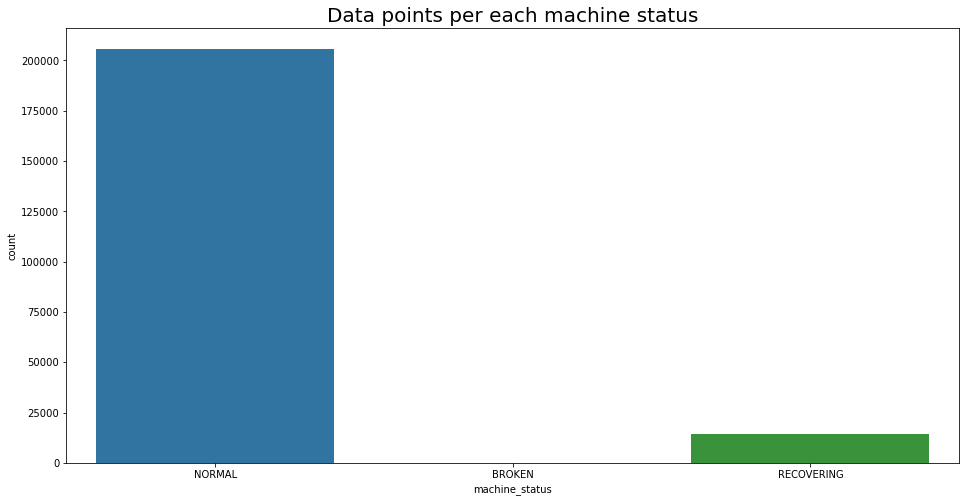

In [17]:
#plotting the count plot of machine_status column
plt.figure(figsize=(16,8))
plt.title('Data points per each machine status', fontsize=20)
sns.countplot(data.machine_status)
plt.show()

# Business problem statement

* Using the data available from various sensors, we need to predict the future health status of the machine, so that the maintenance activities can be effectively performed.

## Modification of dataset to solve business problem

In this dataset, There are three classes in the machine_status column (target_variable) they are, 1. NORMAL, 2. RECOVERING 3. BROKEN. We are predicting whether the machine will become faulty in the future time interval or not using this machine_status column as a target variable.
Dataset is modified as follows:

1. We are considering the datapoints with machine status=RECOVERING, as machine status = 'BROKEN' because recovering state is not the stable operating state of the machine.

2. In the modified dataset, There will be two classes 1.Normal(encoded as 0), 2. Broken(encoded as 1). So, this will
become a binary classification problem

The above modification is done as a part of data preprocessing step. Further modifification of the machine_status column to perform predictive analysis, that is to predict whether the machine will become faulty or not in the next 'm' timestamps is done after the best value of 'm' is obtained using hyperparameter tuning for 'm'.




## Encoding machine_status = BROKEN and machine_status = RECOVERING as '1' and machine_status = NORMAL as '0'

In [18]:
data['machine_status'].replace(to_replace='BROKEN',value=1,inplace=True) # This will replaces 'BROKEN' with '1' in machine_status column
data['machine_status'].replace(to_replace='RECOVERING',value=1,inplace=True) # This will replaces 'RECOVERING' with '1' in machine_status column
data['machine_status'].replace(to_replace='NORMAL',value=0,inplace=True) # This will replaces 'NORMAL' with '1' in machine_status column
print(data.shape)

(220320, 53)


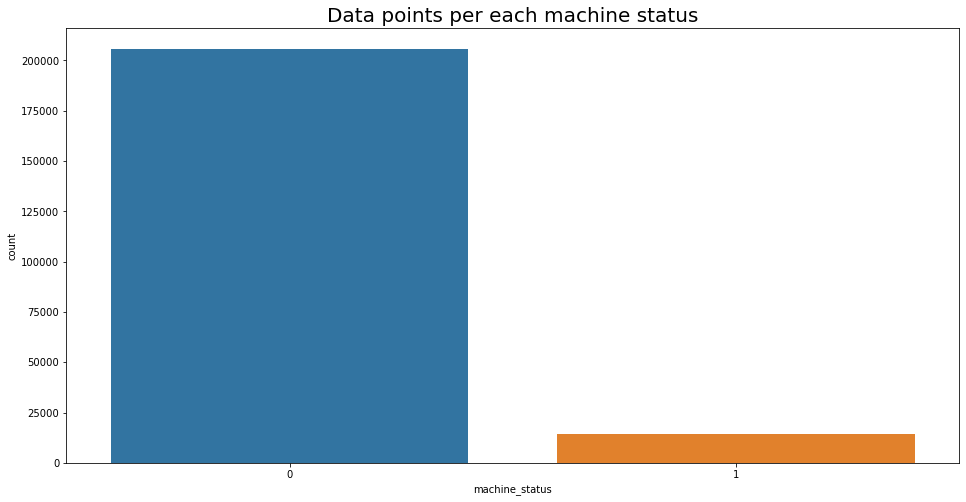

In [19]:
#plotting the count plot of machine_status column
plt.figure(figsize=(16,8))
plt.title('Data points per each machine status', fontsize=20)
sns.countplot(data.machine_status)
plt.show()

In [20]:
print(data['machine_status'].value_counts()) #Printing the count of each unique values in machine status column

0    205836
1     14484
Name: machine_status, dtype: int64


## Removing timestamp column

In [21]:
data = data.drop(['timestamp'], axis=1) # This will remove timestamp column from the dataset

In [22]:
print(data.shape) # printing the shape of the dataset after removing the timestamp column

(220320, 52)


# Exploratory data analysis

## Checking the correlation of all the features with machine_status(target variable) 

In [23]:
most_correlated_features=data.corr().abs()['machine_status'].sort_values(ascending=False) # This will return the correlation of the target variable 'machine_status' with all the features and it is sorted in descending order

In [24]:
print(most_correlated_features[1:11]) #Printing the top 10 features which are highly correlated with the target variable

sensor_04    0.916227
sensor_10    0.872493
sensor_11    0.823450
sensor_00    0.810822
sensor_02    0.791278
sensor_06    0.773933
sensor_12    0.758752
sensor_50    0.732214
sensor_07    0.699499
sensor_01    0.673108
Name: machine_status, dtype: float64


In [25]:
least_correlated_features=most_correlated_features.iloc[-5:] #This will store the least 5 correlated features

In [26]:
print(least_correlated_features)  # printing 5 least correlated features

sensor_34    0.039537
sensor_27    0.032565
sensor_39    0.024299
sensor_36    0.019264
sensor_42    0.007412
Name: machine_status, dtype: float64


## Violin plot and pdf of the most correlated features

## Analysis of the feature 'sensor_04'

violin plot and PDF Of sensor_04 feature


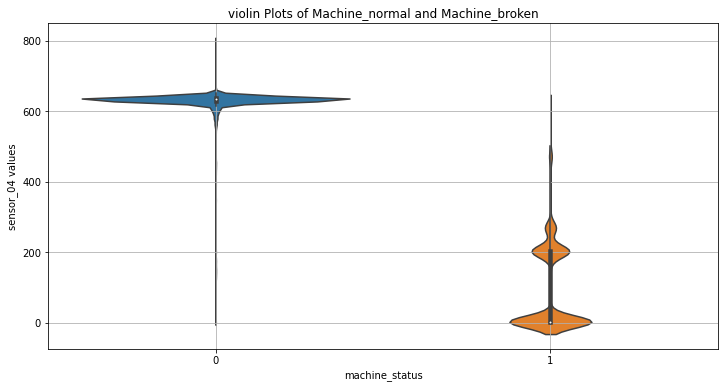

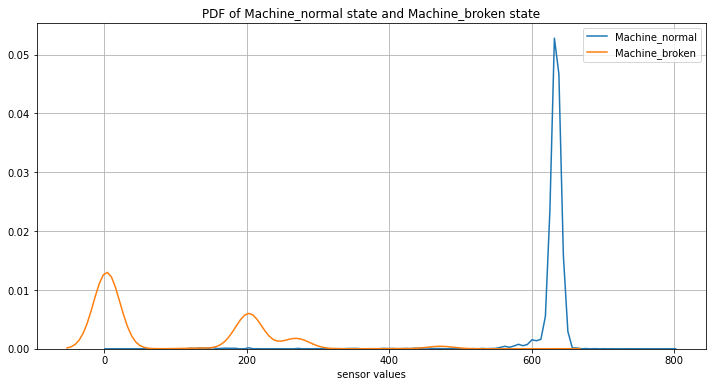

In [27]:
print("violin plot and PDF Of sensor_04 feature")
Machine_normal= data[data['machine_status']==0]['sensor_04'].values # Machine_normal will store the 'sensor_04' values whose machine_status = 0
Machine_broken = data[data['machine_status']==1]['sensor_04'].values # Machine_broken will store the 'sensor_04' values whose machine_status = 1

plt.figure(figsize=(12, 6)) #defining the figure size
sns.violinplot(x='machine_status',y='sensor_04', data=data) #This plots the violin plot
plt.title('violin Plots of Machine_normal and Machine_broken')
temp=str('sensor_04') + str(' ')+str('values') # temp holds the string as defined
plt.ylabel(temp) # This will print y axis name as specified in temp
plt.grid() # This will show the grid in plot
plt.show() # This will display the plot


plt.figure(figsize=(12,6))
sns.distplot(Machine_normal, hist=False, label="Machine_normal") # This plots the pdf of Machine_normal
sns.distplot(Machine_broken, hist=False, label="Machine_broken") # This plots the pdf of Machine_broken
plt.title('PDF of Machine_normal state and Machine_broken state')
plt.xlabel('sensor values') # This will print x axis name as sensor values
plt.grid() # This will show the grid in plot
plt.legend() # This will add legend to the plot
plt.show() # This will display the plot

## Printing percentiles 

In [28]:
#https://stackoverflow.com/questions/11620914/removing-nan-values-from-an-array
print('0-100 percentile values of sensor_04 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))] # This will removes NaN's in Machine_normal if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i)) # printing the percentiles

0-100 percentile values of sensor_04 during the machine_normal state
0 percentile value is 2.798032
5 percentile value is 602.8936
10 percentile value is 621.527770996094
15 percentile value is 624.7686
20 percentile value is 626.7361
25 percentile value is 628.2407
30 percentile value is 629.3981
35 percentile value is 630.4398193359381
40 percentile value is 631.4814
45 percentile value is 632.4074
50 percentile value is 633.3333740234381
55 percentile value is 634.25927734375
60 percentile value is 635.0695
65 percentile value is 635.9954
70 percentile value is 637.0369873046881
75 percentile value is 637.9630000000002
80 percentile value is 639.1204
85 percentile value is 640.50927734375
90 percentile value is 642.129638671875
95 percentile value is 644.7916
100 percentile value is 800.0


In [29]:
print('0-100 percentile values of sensor_04 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))] # This will removes NaN's in Machine_broken if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i)) # printing the percentiles

0-100 percentile values of sensor_04 during the machine_broken state
0 percentile value is 2.798032
5 percentile value is 3.0295138359069806
10 percentile value is 3.1047452688217203
15 percentile value is 3.1452543735504204
20 percentile value is 3.2609952688217203
25 percentile value is 3.3362269401550297
30 percentile value is 3.33622694015503
35 percentile value is 3.3362269401550297
40 percentile value is 3.45196747779846
45 percentile value is 3.45196747779846
50 percentile value is 3.56770825386047
55 percentile value is 3.60821747779846
60 percentile value is 3.60821747779846
65 percentile value is 201.02140808105497
70 percentile value is 202.103576660156
75 percentile value is 203.029495239258
80 percentile value is 203.68342590332
85 percentile value is 204.60935974121102
90 percentile value is 259.66086730957005
95 percentile value is 272.008101940155
100 percentile value is 612.1528


observations of sensor_04

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_04 values are well saperated, also it is seen in the pdf plot that, during the machine is operating in the normal condition, most of the sensor_04 values lies above 600 and during the machine broken state, most of the sensor_04 values lies below 200. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:  
* if the sensor_04 values lies in the range of (621.52, 800.0), then we can conclude that the machine is normal with 90 percent probability.
* if the sensor_04 values lies in the range of (2.79, 3.60), then we can conclude that the machine is broken with 60 percent probability.

Conclusion:
since the probability values are very high, sensor_04 is a very useful feature for classification


## Analysis of the feature 'sensor_38'




violin plot and PDF Of sensor_38 feature


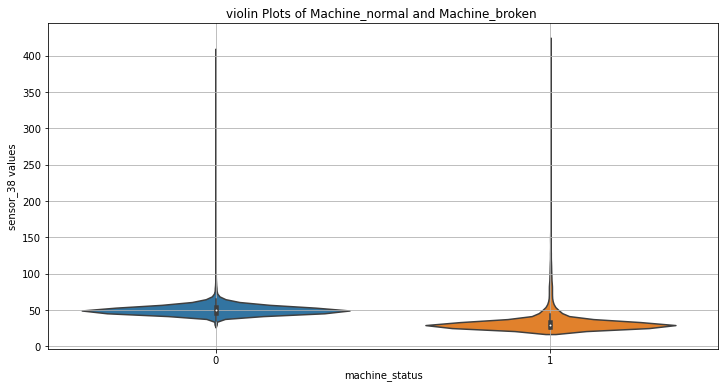

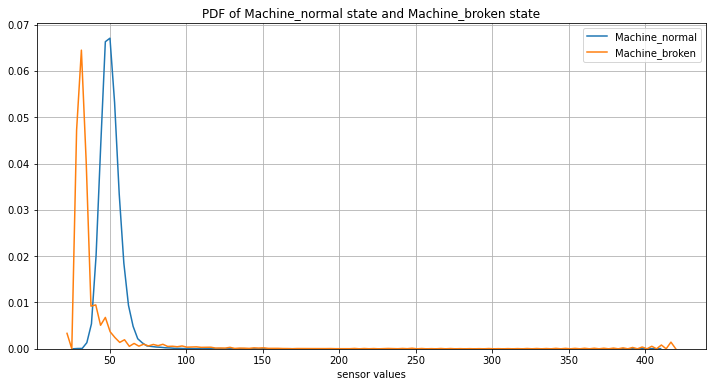

In [30]:
print("violin plot and PDF Of sensor_38 feature")
Machine_normal= data[data['machine_status']==0]['sensor_38'].values # Machine_normal will store the 'sensor_38' values whose machine_status = 0
Machine_broken = data[data['machine_status']==1]['sensor_38'].values # Machine_broken will store the 'sensor_38' values whose machine_status = 1

plt.figure(figsize=(12, 6))  #defining the figure size
sns.violinplot(x='machine_status',y='sensor_38', data=data) #This plots the violin plot
plt.title('violin Plots of Machine_normal and Machine_broken ')
temp=str('sensor_38') + str(' ')+str('values') 
plt.ylabel(temp) # This will print y axis name as specified in temp
plt.grid() # This will show the grid in plot
plt.show() # This will display the plot

plt.figure(figsize=(12,6))  #defining the figure size
sns.distplot(Machine_normal, hist=False, label="Machine_normal") # This plots the pdf of Machine_normal
sns.distplot(Machine_broken, hist=False, label="Machine_broken") # This plots the pdf of Machine_broken
plt.title('PDF of Machine_normal state and Machine_broken state')
plt.xlabel('sensor values') # This will print x axis name as sensor values
plt.grid() # This will show the grid in plot
plt.legend() # This will add legend to the plot
plt.show() # This will display the plot

## Printing percentiles 

In [31]:
print('0-100 percentile values of sensor_38 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))] # This will removes NaN's in Machine_normal if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i)) # printing percentiles

0-100 percentile values of sensor_38 during the machine_normal state
0 percentile value is 27.6041660308838
5 percentile value is 41.40625
10 percentile value is 42.96875
15 percentile value is 44.27083
20 percentile value is 45.3125
25 percentile value is 46.09375
30 percentile value is 46.875
35 percentile value is 47.91666
40 percentile value is 48.4375
45 percentile value is 49.21875
50 percentile value is 49.73958
55 percentile value is 50.78125
60 percentile value is 51.30208
65 percentile value is 52.34375
70 percentile value is 53.125
75 percentile value is 53.90625
80 percentile value is 55.20832999999999
85 percentile value is 56.51041
90 percentile value is 58.59375
95 percentile value is 61.71875
100 percentile value is 408.5937


In [32]:
print('0-100 percentile values of sensor_38 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))] # This will removes NaN's in Machine_broken if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i)) # printing percentiles

0-100 percentile values of sensor_38 during the machine_broken state
0 percentile value is 24.4791660308838
5 percentile value is 24.739582061767607
10 percentile value is 25.0
15 percentile value is 25.26042
20 percentile value is 26.302082061767607
25 percentile value is 27.3437480926514
30 percentile value is 27.864582061767607
35 percentile value is 28.385416030883803
40 percentile value is 28.645832061767607
45 percentile value is 28.90625
50 percentile value is 29.9479160308838
55 percentile value is 30.4687480926514
60 percentile value is 31.5104160308838
65 percentile value is 32.29166
70 percentile value is 33.0729141235352
75 percentile value is 34.1145820617676
80 percentile value is 35.15625
85 percentile value is 38.28125
90 percentile value is 44.79166
95 percentile value is 59.11458
100 percentile value is 417.7083


observations of sensor_38

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_38 values are well saperated, also it is seen in the pdf plot that, most of the sensor_38 values are less during the broken state compared to normal state. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state :  
* if the sensor_38 values lies in the range of (41.40, 61.71), then we can conclude that the machine is normal with 90 percent probability.
* if the sensor_38 values lies in the range of (24.47, 59.11), then we can conclude that the machine is broken with 95 percent probability.

Conclusion:
since the probability values are very high, sensor_38 is a very useful feature for classification


## Analysis of the feature 'sensor_00'

violin plot and PDF Of sensor_00 feature


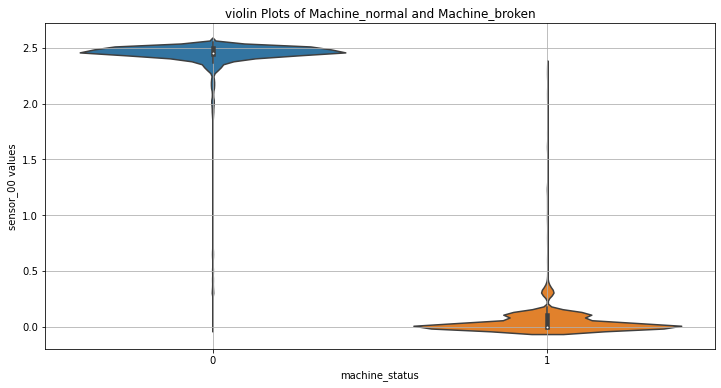

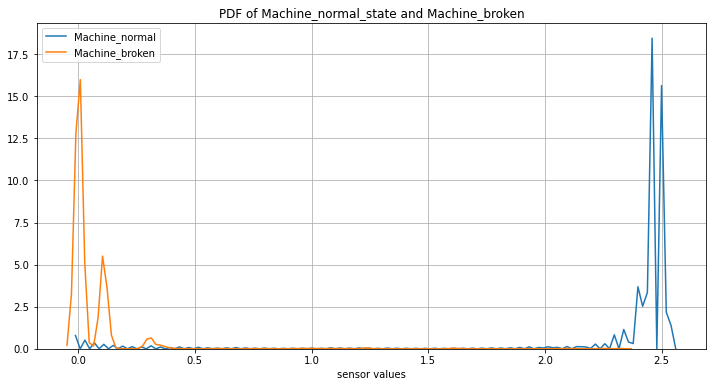

In [33]:
print("violin plot and PDF Of sensor_00 feature")
Machine_normal= data[data['machine_status']==0]['sensor_00'].values # Machine_normal will store the 'sensor_00' values whose machine_status = 0
Machine_broken = data[data['machine_status']==1]['sensor_00'].values # Machine_broken will store the 'sensor_00' values whose machine_status = 1

plt.figure(figsize=(12, 6)) #defining the figure size
sns.violinplot(x='machine_status',y='sensor_00', data=data) #This plots the violin plot
plt.title('violin Plots of Machine_normal and Machine_broken')
temp=str('sensor_00') + str(' ')+str('values')
plt.ylabel(temp) # This will print y axis name as specified in temp
plt.grid() # This will show the grid in plot
plt.show() # This will display the plot 


plt.figure(figsize=(12,6)) #defining the figure size
sns.distplot(Machine_normal, hist=False, label="Machine_normal") # This plots the pdf of Machine_normal
sns.distplot(Machine_broken, hist=False, label="Machine_broken") # This plots the pdf of Machine_broken
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values') # This will print x axis name as sensor values
plt.grid() # This will show the grid in plot
plt.legend() # This will add legend to the plot
plt.show() # This will display the plot


## Printing percentiles

In [34]:
print('0-100 percentile values of sensor_00 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))] # This will removes NaN's in Machine_normal if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i)) #printing percentiles

0-100 percentile values of sensor_00 during the machine_normal state
0 percentile value is 0.0
5 percentile value is 2.3011
10 percentile value is 2.392593
15 percentile value is 2.402431
20 percentile value is 2.421123
25 percentile value is 2.444734
30 percentile value is 2.449653
35 percentile value is 2.45162
40 percentile value is 2.453588
45 percentile value is 2.455556
50 percentile value is 2.456539
55 percentile value is 2.459491
60 percentile value is 2.468345
65 percentile value is 2.481134
70 percentile value is 2.495891
75 percentile value is 2.499826
80 percentile value is 2.503762
85 percentile value is 2.504745
90 percentile value is 2.508681
95 percentile value is 2.510648
100 percentile value is 2.549016


In [35]:
print('0-100 percentile values of sensor_00 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))] # This will removes NaN's in Machine_broken if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i)) #printing percentiles

0-100 percentile values of sensor_00 during the machine_broken state
0 percentile value is 0.0
5 percentile value is 0.0019675926305353602
10 percentile value is 0.0019675926305353602
15 percentile value is 0.0019675926305353602
20 percentile value is 0.0019675926305353602
25 percentile value is 0.0019675926305353602
30 percentile value is 0.0019675926305353602
35 percentile value is 0.0019675926305353602
40 percentile value is 0.001967593
45 percentile value is 0.001967593
50 percentile value is 0.001967593
55 percentile value is 0.003935185
60 percentile value is 0.003935185
65 percentile value is 0.00393518526107073
70 percentile value is 0.00393518526107073
75 percentile value is 0.109201394021511
80 percentile value is 0.1092014
85 percentile value is 0.11018519103527097
90 percentile value is 0.112152777612209
95 percentile value is 0.3039931
100 percentile value is 2.321759


observations of sensor_00

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_00 values are well saperated, also it is seen in the pdf plot that, both the distributions are well saperated. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:

* if the sensor_00 values lies in the range of (2.30, 2.54), then we can conclude that the machine is normal with 95 percent probability.
* if the sensor_00 values lies in the range of (0.00, 0.30), then we can conclude that the machine is broken with 95 percent probability.

Conclusion:
since the probability values are very high, sensor_00 is a very useful feature for classification


## Analysis of the feature 'sensor_39'


violin plot and PDF Of sensor_39 feature


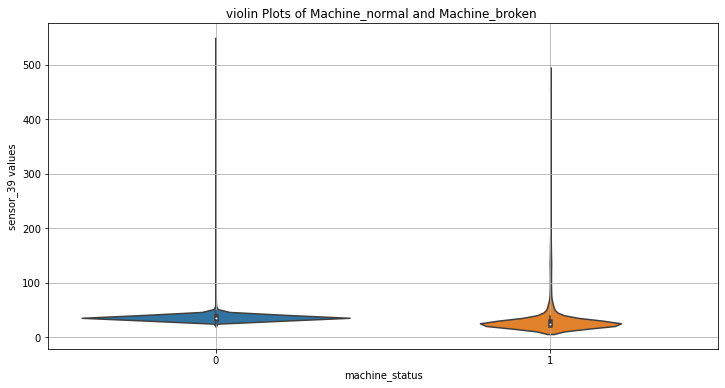

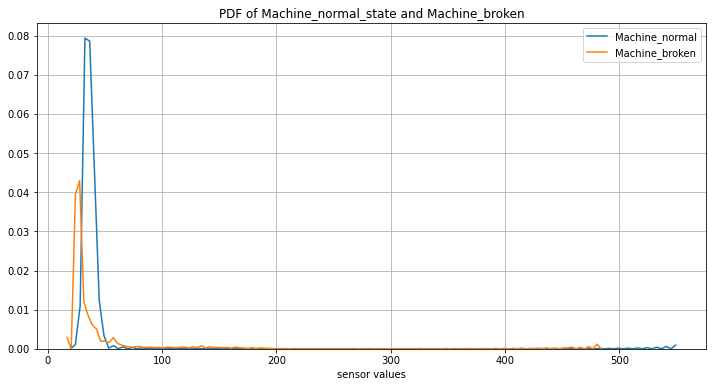

In [36]:
print("violin plot and PDF Of sensor_39 feature")
Machine_normal= data[data['machine_status']==0]['sensor_39'].values # Machine_normal will store the 'sensor_39' values whose machine_status = 0
Machine_broken = data[data['machine_status']==1]['sensor_39'].values # Machine_broken will store the 'sensor_39' values whose machine_status = 1

plt.figure(figsize=(12, 6)) #defining the figure size
sns.violinplot(x='machine_status',y='sensor_39', data=data) #This plots the violin plot
plt.title('violin Plots of Machine_normal and Machine_broken ')
temp=str('sensor_39') + str(' ')+str('values')
plt.ylabel(temp) # This will print y axis name as specified in temp
plt.grid() # This will show the grid in plot
plt.show() # This will display the plot 


plt.figure(figsize=(12,6)) #defining the figure size
sns.distplot(Machine_normal, hist=False, label="Machine_normal") # This plots the pdf of Machine_normal
sns.distplot(Machine_broken, hist=False, label="Machine_broken") # This plots the pdf of Machine_broken
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values') # This will print x axis name as sensor values
plt.grid() # This will show the grid in plot
plt.legend() # This will add legend to the plot
plt.show() # This will display the plot

In [37]:
print('0-100 percentile values of sensor_39 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))] # This will removes NaN's in Machine_normal if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i)) #printing percentiles

0-100 percentile values of sensor_39 during the machine_normal state
0 percentile value is 21.3541660308838
5 percentile value is 29.166670000000003
10 percentile value is 30.46875
15 percentile value is 31.51042
20 percentile value is 32.29166
25 percentile value is 32.8125
30 percentile value is 33.59375
35 percentile value is 34.11458
40 percentile value is 34.375
45 percentile value is 35.15625
50 percentile value is 35.67708
55 percentile value is 36.45833
60 percentile value is 36.97916
65 percentile value is 37.76041
70 percentile value is 38.28125
75 percentile value is 39.0625
80 percentile value is 40.10416
85 percentile value is 40.88541
90 percentile value is 42.1875
95 percentile value is 44.53125
100 percentile value is 547.9166


In [38]:
print('0-100 percentile values of sensor_39 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))] # This will removes NaN's in Machine_broken if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i)) #printing percentiles

0-100 percentile values of sensor_39 during the machine_broken state
0 percentile value is 19.27083
5 percentile value is 19.7916660308838
10 percentile value is 20.572916030883803
15 percentile value is 21.09375
20 percentile value is 21.875
25 percentile value is 22.1354160308838
30 percentile value is 22.65625
35 percentile value is 23.177082061767607
40 percentile value is 23.4375
45 percentile value is 23.69792
50 percentile value is 24.4791660308838
55 percentile value is 25.0
60 percentile value is 25.781248092651403
65 percentile value is 26.302082061767607
70 percentile value is 27.083332061767607
75 percentile value is 28.9062480926514
80 percentile value is 30.46875
85 percentile value is 35.41666
90 percentile value is 44.01041
95 percentile value is 80.46875
100 percentile value is 481.7708


observations of sensor_39

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_39 values are almost overlapping, also it is seen in the pdf plot that, most of the values from both the classes lies in the same range. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state :  
* if the sensor_39 values lies in the range of (21.35, 35.67), then we can conclude that the machine is normal with 50 percent probability.
* if the sensor_39 values lies in the range of (44.01, 481.77), then we can conclude that the machine is broken with 10 percent probability.

Conclusion:
since the probability values are very less, sensor_39 is not a very useful feature for classification


## Analysis of the feature 'sensor_06'




violin plot and PDF Of sensor_06 feature


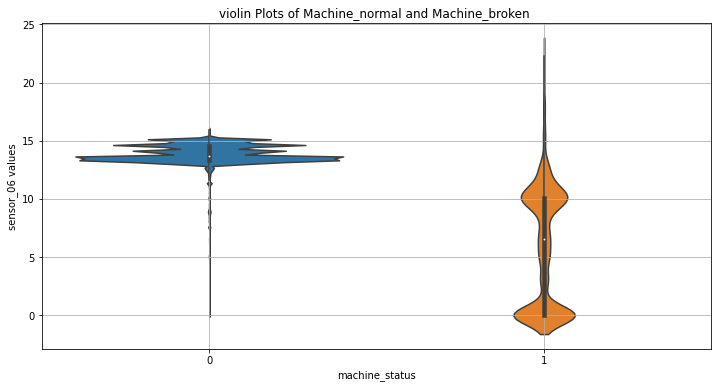

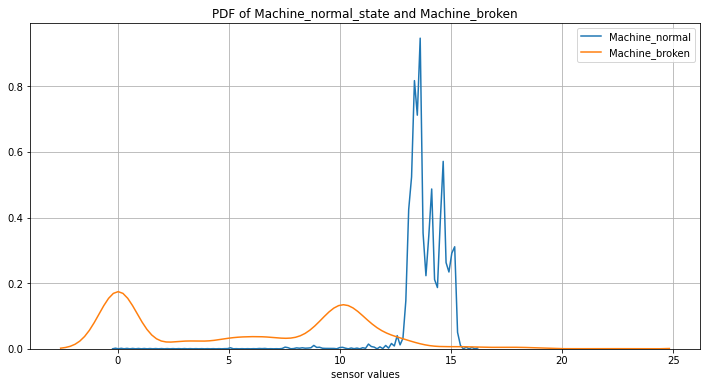

In [39]:
print("violin plot and PDF Of sensor_06 feature")
Machine_normal= data[data['machine_status']==0]['sensor_06'].values # Machine_normal will store the 'sensor_06' values whose machine_status = 0
Machine_broken = data[data['machine_status']==1]['sensor_06'].values # Machine_broken will store the 'sensor_06' values whose machine_status = 1

plt.figure(figsize=(12, 6)) #defining the figure size
sns.violinplot(x='machine_status',y='sensor_06', data=data) #This plots the violin plot
plt.title('violin Plots of Machine_normal and Machine_broken ')
temp=str('sensor_06') + str(' ')+str('values')
plt.ylabel(temp) # This will print y axis name as specified in temp
plt.grid() # This will show the grid in plot
plt.show() # This will display the plot 


plt.figure(figsize=(12,6)) #defining the figure size
sns.distplot(Machine_normal, hist=False, label="Machine_normal") # This plots the pdf of Machine_normal
sns.distplot(Machine_broken, hist=False, label="Machine_broken") # This plots the pdf of Machine_broken
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values') # This will print x axis name as sensor values
plt.grid() # This will show the grid in plot
plt.legend() # This will add legend to the plot
plt.show() # This will display the plot

In [40]:
print('0-100 percentile values of sensor_06 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))] # This will removes NaN's in Machine_normal if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i)) # printing percentiles

0-100 percentile values of sensor_06 during the machine_normal state
0 percentile value is 0.01446759
5 percentile value is 13.057
10 percentile value is 13.14381
15 percentile value is 13.288479999999998
20 percentile value is 13.32465
25 percentile value is 13.38252
30 percentile value is 13.447629999999998
35 percentile value is 13.53443
40 percentile value is 13.592300000000002
45 percentile value is 13.628470000000002
50 percentile value is 13.67911
55 percentile value is 13.86719
60 percentile value is 14.0625
65 percentile value is 14.13484
70 percentile value is 14.32292
75 percentile value is 14.56887
80 percentile value is 14.60503
85 percentile value is 14.677370000000002
90 percentile value is 14.89439
95 percentile value is 15.0897
100 percentile value is 15.96499


In [41]:
print('0-100 percentile values of sensor_06 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))] # This will removes NaN's in Machine_broken if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i)) # printing percentiles

0-100 percentile values of sensor_06 during the machine_broken state
0 percentile value is 0.01446759
5 percentile value is 0.0144675923511386
10 percentile value is 0.02893518
15 percentile value is 0.028935184702277204
20 percentile value is 0.028935184702277197
25 percentile value is 0.0289351847022772
30 percentile value is 0.0289351847022772
35 percentile value is 0.028935184702277197
40 percentile value is 3.030961
45 percentile value is 5.063657
50 percentile value is 6.553819
55 percentile value is 7.5882520000000016
60 percentile value is 9.085648
65 percentile value is 10.06221
70 percentile value is 10.08391
75 percentile value is 10.09838
80 percentile value is 10.120080000000002
85 percentile value is 11.04601
90 percentile value is 11.32089
95 percentile value is 12.62297
100 percentile value is 22.25116


observations of sensor_06

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_06 values are well saperated, also it is seen in the pdf plot that, the distributions of both the class points are well saperated. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:

* if the sensor_06 values lies in the range of (13.05, 15.96), then we can conclude that the machine is normal with 95 percent probability.
* if the sensor_06 values lies in the range of (0.01, 12.62), then we can conclude that the machine is broken with 95 percent probability.

Conclusion:
since the probability values are very high, sensor_06 is a  useful feature for classification


## Analysis of the feature 'sensor_41'





violin plot and PDF Of sensor_41 feature


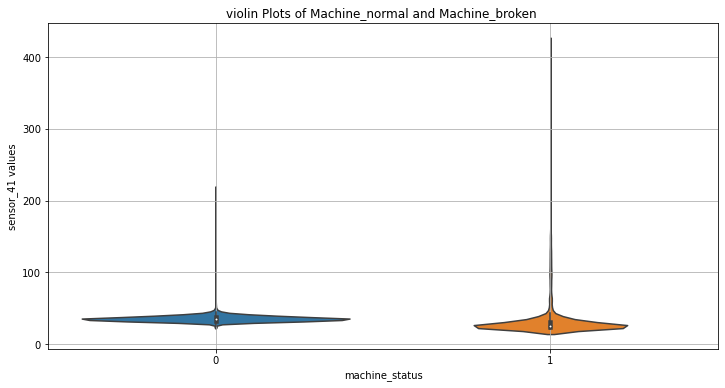

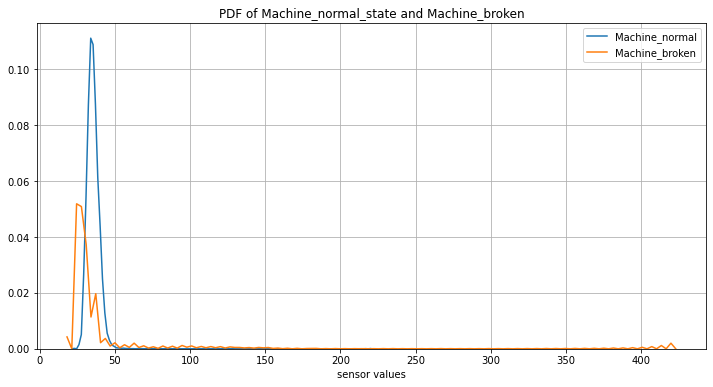

In [42]:
print("violin plot and PDF Of sensor_41 feature")
Machine_normal= data[data['machine_status']==0]['sensor_41'].values # Machine_normal will store the 'sensor_41' values whose machine_status = 0
Machine_broken = data[data['machine_status']==1]['sensor_41'].values # Machine_broken will store the 'sensor_41' values whose machine_status = 1

plt.figure(figsize=(12, 6)) #defining the figure size
sns.violinplot(x='machine_status',y='sensor_41', data=data) #This plots the violin plot
plt.title('violin Plots of Machine_normal and Machine_broken ')
temp=str('sensor_41') + str(' ')+str('values')
plt.ylabel(temp) # This will print y axis name as specified in temp
plt.grid() # This will show the grid in plot
plt.show() # This will display the plot 

 
plt.figure(figsize=(12,6)) #defining the figure size
sns.distplot(Machine_normal, hist=False, label="Machine_normal") # This plots the pdf of Machine_normal
sns.distplot(Machine_broken, hist=False, label="Machine_broken") # This plots the pdf of Machine_broken
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values') # This will print x axis name as sensor values
plt.grid() # This will show the grid in plot
plt.legend() # This will add legend to the plot
plt.show() # This will display the plot

In [43]:
print('0-100 percentile values of sensor_41 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))] # This will removes NaN's in Machine_normal if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i)) # printing percentiles

0-100 percentile values of sensor_41 during the machine_normal state
0 percentile value is 22.39583
5 percentile value is 29.947920000000003
10 percentile value is 30.98958
15 percentile value is 31.51042
20 percentile value is 32.2916641235352
25 percentile value is 32.8125
30 percentile value is 33.59375
35 percentile value is 33.85416
40 percentile value is 34.1145820617676
45 percentile value is 34.89583
50 percentile value is 35.15625
55 percentile value is 35.416664123535206
60 percentile value is 36.19791
65 percentile value is 36.4583320617676
70 percentile value is 36.97916
75 percentile value is 37.76041
80 percentile value is 38.28125
85 percentile value is 39.32291
90 percentile value is 40.36458
95 percentile value is 41.92708
100 percentile value is 219.0104


In [44]:
print('0-100 percentile values of sensor_41 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))] # This will removes NaN's in Machine_broken if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i)) # printing percentiles

0-100 percentile values of sensor_41 during the machine_broken state
0 percentile value is 20.83333
5 percentile value is 21.09375
10 percentile value is 21.354166030883803
15 percentile value is 21.875
20 percentile value is 22.65625
25 percentile value is 23.4375
30 percentile value is 23.95833
35 percentile value is 24.4791660308838
40 percentile value is 24.739582061767607
45 percentile value is 25.0
50 percentile value is 25.7812480926514
55 percentile value is 26.302082061767607
60 percentile value is 27.6041660308838
65 percentile value is 28.385416030883803
70 percentile value is 29.6875
75 percentile value is 31.2499980926514
80 percentile value is 32.29166
85 percentile value is 36.45833
90 percentile value is 39.32291
95 percentile value is 72.18749399999923
100 percentile value is 420.3125


observations of sensor_41

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_41 values are almost overlapping, also it is seen in the pdf plot that, the distributions are not well saperated. the exact numbers are shown by printing the percentiles.

Conclusion:
* Since there is a huge overlap in the machine_normal state and machine_broken state distributions of sensor_41 values, this feature is not useful for classification 


## Analysis of the feature 'sensor_07'





violin plot and PDF Of sensor_07 feature


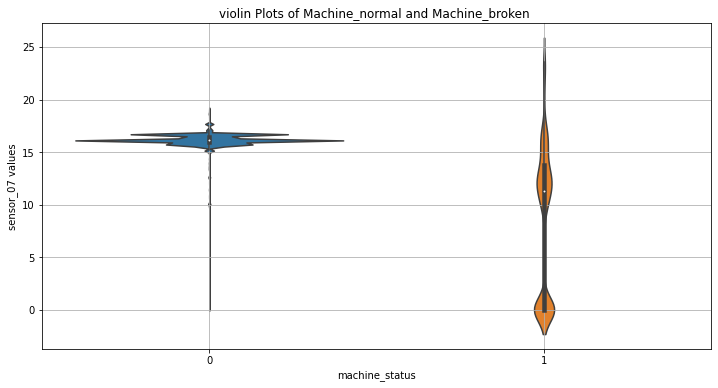

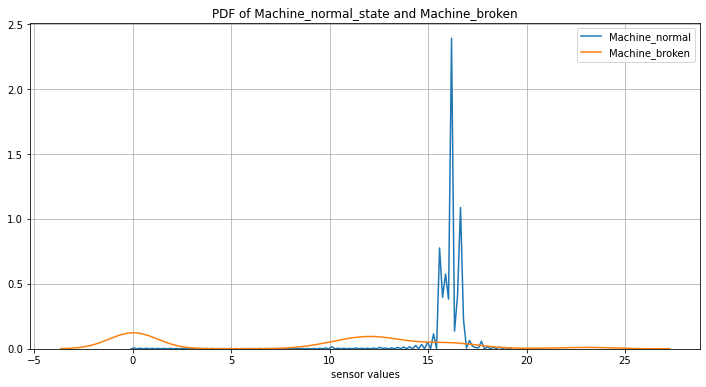

In [45]:
print("violin plot and PDF Of sensor_07 feature")
Machine_normal= data[data['machine_status']==0]['sensor_07'].values # Machine_normal will store the 'sensor_07' values whose machine_status = 0
Machine_broken = data[data['machine_status']==1]['sensor_07'].values # Machine_normal will store the 'sensor_07' values whose machine_status = 1

plt.figure(figsize=(12, 6)) #defining the figure size
sns.violinplot(x='machine_status',y='sensor_07', data=data) #This plots the violin plot
plt.title('violin Plots of Machine_normal and Machine_broken ')
temp=str('sensor_07') + str(' ')+str('values')
plt.ylabel(temp) # This will print y axis name as specified in temp
plt.grid() # This will show the grid in plot
plt.show() # This will display the plot 


plt.figure(figsize=(12,6)) #defining the figure size
sns.distplot(Machine_normal, hist=False, label="Machine_normal") # This plots the pdf of Machine_normal
sns.distplot(Machine_broken, hist=False, label="Machine_broken") # This plots the pdf of Machine_broken
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values') # This will print x axis name as sensor values
plt.grid() # This will show the grid in plot
plt.legend() # This will add legend to the plot
plt.show() # This will display the plot

In [46]:
print('0-100 percentile values of sensor_07 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))] # This will removes NaN's in Machine_normal if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i)) #printing percentiles

0-100 percentile values of sensor_07 during the machine_normal state
0 percentile value is 0.02893518
5 percentile value is 15.625
10 percentile value is 15.661170000000002
15 percentile value is 15.668400000000002
20 percentile value is 15.85648
25 percentile value is 15.95052
30 percentile value is 16.0735
35 percentile value is 16.13136
40 percentile value is 16.13136
45 percentile value is 16.16753
50 percentile value is 16.16753
55 percentile value is 16.16753
60 percentile value is 16.21094
65 percentile value is 16.23987
70 percentile value is 16.391779999999994
75 percentile value is 16.42795
80 percentile value is 16.6088
85 percentile value is 16.6522
90 percentile value is 16.70284
95 percentile value is 16.70284
100 percentile value is 19.13339


In [47]:
print('0-100 percentile values of sensor_07 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))] # This will removes NaN's in Machine_broken if any
for i in range(0,101,5): 
    print(i,'percentile value is',np.percentile(Machine_broken,i)) #printing percentiles

0-100 percentile values of sensor_07 during the machine_broken state
0 percentile value is 0.0
5 percentile value is 0.0361689813435078
10 percentile value is 0.0361689813435078
15 percentile value is 0.0361689813435078
20 percentile value is 0.0361689813435078
25 percentile value is 0.0361689813435078
30 percentile value is 0.0361689813435078
35 percentile value is 0.0361689813435078
40 percentile value is 9.85243
45 percentile value is 10.12731
50 percentile value is 11.34983
55 percentile value is 11.36429
60 percentile value is 12.57957
65 percentile value is 12.60127
70 percentile value is 12.62297
75 percentile value is 13.80932
80 percentile value is 15.08247
85 percentile value is 15.37905
90 percentile value is 16.42795
95 percentile value is 17.66493
100 percentile value is 23.59664


observations of sensor_07

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_07 values are well saperated, also it is seen in the pdf plot that, both the distributions well saperated. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:

* if the sensor_07 values lies in the range of (16.13, 19.13), then we can conclude that the machine is normal with 65 percent probability.
* if the sensor_07 values lies in the range of (0.03, 15.37), then we can conclude that the machine is broken with 80 percent probability.

Conclusion:
since the probability values are high, sensor_07 is a  useful feature for classification


## Analysis of the feature 'sensor_09'




violin plot and PDF Of sensor_09 feature


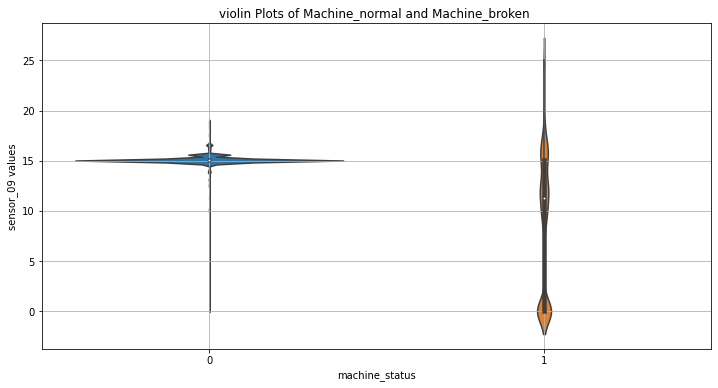

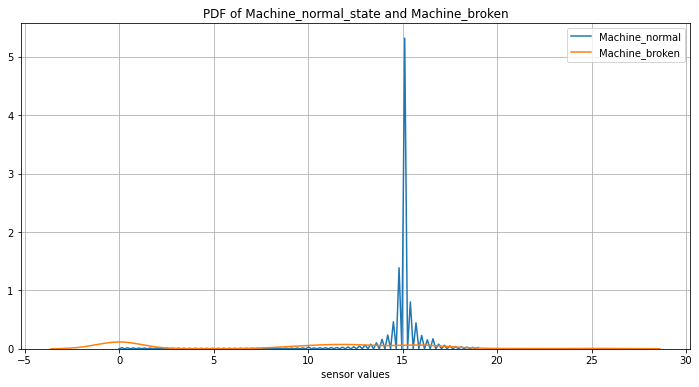

In [48]:
print("violin plot and PDF Of sensor_09 feature")
Machine_normal= data[data['machine_status']==0]['sensor_09'].values # Machine_normal will store the 'sensor_09' values whose machine_status = 0
Machine_broken = data[data['machine_status']==1]['sensor_09'].values # Machine_normal will store the 'sensor_09' values whose machine_status = 1

plt.figure(figsize=(12, 6)) #defining the figure size
sns.violinplot(x='machine_status',y='sensor_09', data=data) #This plots the violin plot
plt.title('violin Plots of Machine_normal and Machine_broken ')
temp=str('sensor_09') + str(' ')+str('values')
plt.ylabel(temp) # This will print y axis name as specified in temp
plt.grid() # This will show the grid in plot
plt.show() # This will display the plot 


plt.figure(figsize=(12,6)) #defining the figure size
sns.distplot(Machine_normal, hist=False, label="Machine_normal") # This plots the pdf of Machine_normal
sns.distplot(Machine_broken, hist=False, label="Machine_broken") # This plots the pdf of Machine_broken
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values') # This will print x axis name as sensor values
plt.grid() # This will show the grid in plot
plt.legend() # This will add legend to the plot
plt.show() # This will display the plot

In [49]:
print('0-100 percentile values of sensor_09 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))] # This will removes NaN's in Machine_normal if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i)) #printing percentiles

0-100 percentile values of sensor_09 during the machine_normal state
0 percentile value is 0.007233796
5 percentile value is 14.79311
10 percentile value is 14.82205
15 percentile value is 14.901619999999998
20 percentile value is 15.010129999999998
25 percentile value is 15.05353
30 percentile value is 15.053530000000002
35 percentile value is 15.05353
40 percentile value is 15.08247
45 percentile value is 15.08247
50 percentile value is 15.08247
55 percentile value is 15.08247
60 percentile value is 15.0897
65 percentile value is 15.11863
70 percentile value is 15.11863
75 percentile value is 15.11863
80 percentile value is 15.16204
85 percentile value is 15.162040000000001
90 percentile value is 15.38628
95 percentile value is 15.59606
100 percentile value is 18.98871


In [50]:
print('0-100 percentile values of sensor_09 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))] # This will removes NaN's in Machine_broken if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i)) #printing percentiles

0-100 percentile values of sensor_09 during the machine_broken state
0 percentile value is 0.0
5 percentile value is 0.0072337961755693
10 percentile value is 0.0072337961755693
15 percentile value is 0.007233796175569299
20 percentile value is 0.007233796175569299
25 percentile value is 0.0072337961755693
30 percentile value is 0.007233796175569299
35 percentile value is 0.0072337961755693
40 percentile value is 8.839699000000003
45 percentile value is 10.09115
50 percentile value is 11.29196
55 percentile value is 11.53067
60 percentile value is 12.33362
65 percentile value is 12.58681
70 percentile value is 12.643227999999993
75 percentile value is 15.05353
80 percentile value is 15.11863
85 percentile value is 16.0952
90 percentile value is 16.39902
95 percentile value is 17.65046
100 percentile value is 25.0


observations of sensor_09

* From the above violin plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_09 values are partially well saperated, also it is seen in the pdf plot that, during the machine is operating in the normal condition, sensor_09 values variance is very less and during the machine broken state, sensor_09 values variance is very high. the exact numbers are obtained by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:

* if the sensor_09 values lies in the range of (14.79, 15.59), then we can conclude that the machine is normal with 90 percent probability.
* if the sensor_09 values lies in the range of (0.00, 12.64), then we can conclude that the machine is broken with 70 percent probability.

Conclusion:
since the probability values are high, sensor_09 is a  useful feature for classification


## Analysis of the feature 'sensor_08'




violin plot and PDF Of sensor_08 feature


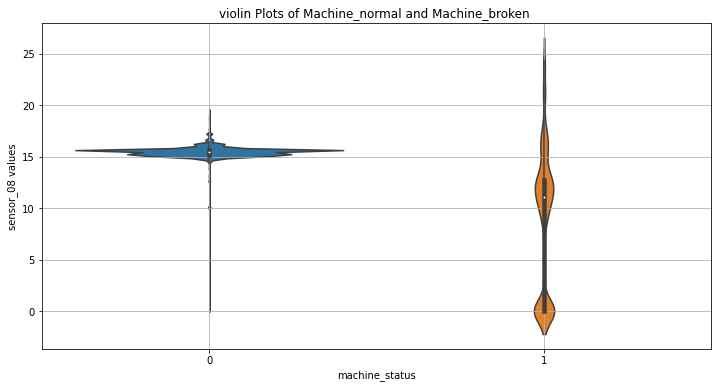

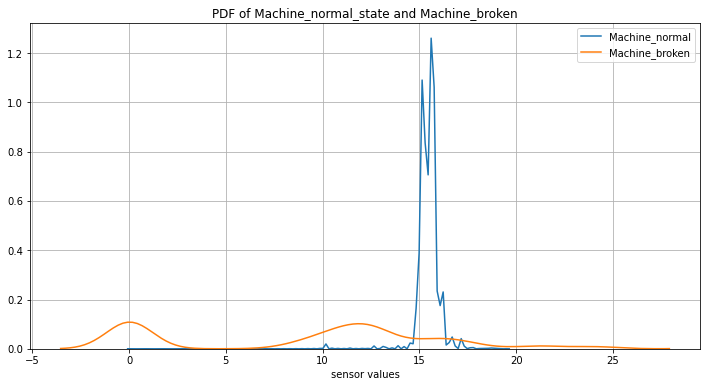

In [51]:
print("violin plot and PDF Of sensor_08 feature")
Machine_normal= data[data['machine_status']==0]['sensor_08'].values # Machine_normal will store the 'sensor_08' values whose machine_status = 0
Machine_broken = data[data['machine_status']==1]['sensor_08'].values # Machine_normal will store the 'sensor_08' values whose machine_status = 1

plt.figure(figsize=(12, 6)) #defining the figure size
sns.violinplot(x='machine_status',y='sensor_08', data=data) #This plots the violin plot
plt.title('violin Plots of Machine_normal and Machine_broken ')
temp=str('sensor_08') + str(' ')+str('values')
plt.ylabel(temp) # This will print y axis name as specified in temp
plt.grid() # This will show the grid in plot
plt.show() # This will display the plot 

plt.figure(figsize=(12,6)) #defining the figure size
sns.distplot(Machine_normal, hist=False, label="Machine_normal") # This plots the pdf of Machine_normal
sns.distplot(Machine_broken, hist=False, label="Machine_broken") # This plots the pdf of Machine_broken
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values') # This will print x axis name as sensor values
plt.grid() # This will show the grid in plot
plt.legend() # This will add legend to the plot
plt.show() # This will display the plot

In [52]:
print('0-100 percentile values of sensor_08 during the machine_normal state') 
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))] # This will removes NaN's in Machine_normal if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i)) # printing percentiles

0-100 percentile values of sensor_08 during the machine_normal state
0 percentile value is 0.02893518
5 percentile value is 14.91609
10 percentile value is 15.03906
15 percentile value is 15.11863
20 percentile value is 15.147570000000002
25 percentile value is 15.18374
30 percentile value is 15.26331
35 percentile value is 15.29224
40 percentile value is 15.37182
45 percentile value is 15.45139
50 percentile value is 15.49479
55 percentile value is 15.56713
60 percentile value is 15.617770000000004
65 percentile value is 15.653930000000003
70 percentile value is 15.69734
75 percentile value is 15.69734
80 percentile value is 15.73351
85 percentile value is 15.81308
90 percentile value is 15.94329
95 percentile value is 16.19647
100 percentile value is 19.53848


In [53]:
print('0-100 percentile values of sensor_08 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))] # This will removes NaN's in Machine_broken if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i)) # printing percentiles

0-100 percentile values of sensor_08 during the machine_broken state
0 percentile value is 0.02893518
5 percentile value is 0.0289351847022772
10 percentile value is 0.0289351847022772
15 percentile value is 0.0289351847022772
20 percentile value is 0.0289351847022772
25 percentile value is 0.0289351847022772
30 percentile value is 0.0289351847022772
35 percentile value is 8.890335
40 percentile value is 10.12008
45 percentile value is 11.04601
50 percentile value is 11.14005
55 percentile value is 11.40046
60 percentile value is 12.51447
65 percentile value is 12.61574
70 percentile value is 12.66638
75 percentile value is 12.74595
80 percentile value is 15.147570000000002
85 percentile value is 16.38455
90 percentile value is 16.74624
95 percentile value is 21.12268
100 percentile value is 24.34896


observations of sensor_08

* From the above box plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_08 values well saperated, also it is seen in the pdf plot that, during the machine is operating in the normal condition, sensor_08 values variance is very less and during the machine broken state, sensor_08 values variance is very high. the exact numbers are shown by printing the percentiles.

Observations from percentiles of machine_normal state and machine_broken state:

* if the sensor_08 values lies in the range of (14.91, 19.53), then we can conclude that the machine is normal with 95 percent probability.
* if the sensor_08 values lies in the range of (0.02, 12.74), then we can conclude that the machine is broken with 75 percent probability.

Conclusion:
* Since the probability values are high, this feature is very useful for classification 


## Analysis of the feature 'sensor_05'





violin plot and PDF Of sensor_05 feature


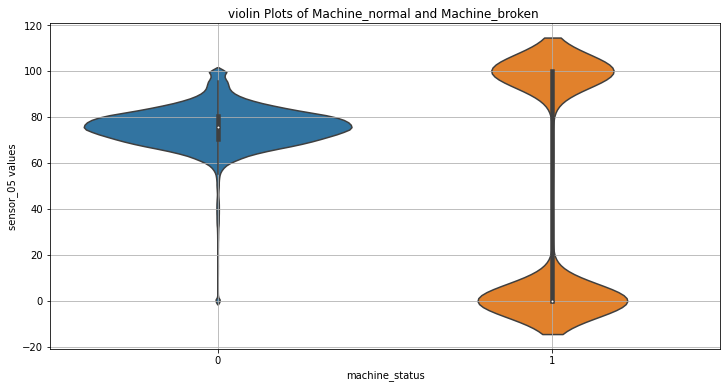

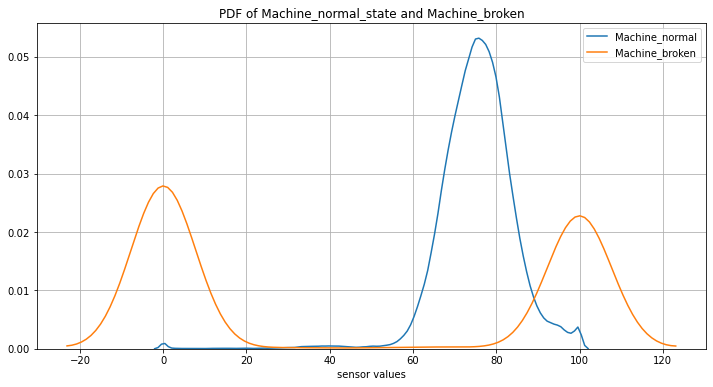

In [54]:
print("violin plot and PDF Of sensor_05 feature")
Machine_normal= data[data['machine_status']==0]['sensor_05'].values # Machine_normal will store the 'sensor_05' values whose machine_status = 0
Machine_broken = data[data['machine_status']==1]['sensor_05'].values # Machine_normal will store the 'sensor_05' values whose machine_status = 1

plt.figure(figsize=(12, 6)) #defining the figure size
sns.violinplot(x='machine_status',y='sensor_05', data=data) #This plots the violin plot
plt.title('violin Plots of Machine_normal and Machine_broken ')
temp=str('sensor_05') + str(' ')+str('values')
plt.ylabel(temp) # This will print y axis name as specified in temp
plt.grid() # This will show the grid in plot
plt.show() # This will display the plot 

plt.figure(figsize=(12,6)) #defining the figure size
sns.distplot(Machine_normal, hist=False, label="Machine_normal") # This plots the pdf of Machine_normal
sns.distplot(Machine_broken, hist=False, label="Machine_broken") # This plots the pdf of Machine_broken
plt.title('PDF of Machine_normal_state and Machine_broken')
plt.xlabel('sensor values') # This will print x axis name as sensor values
plt.grid() # This will show the grid in plot
plt.legend() # This will add legend to the plot
plt.show() # This will display the plot

In [55]:
print('0-100 percentile values of sensor_05 during the machine_normal state')
Machine_normal = Machine_normal[np.logical_not(np.isnan(Machine_normal))] # This will removes NaN's in Machine_normal if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_normal,i)) # printing percentiles

0-100 percentile values of sensor_05 during the machine_normal state
0 percentile value is 0.0
5 percentile value is 62.9656435
10 percentile value is 65.944957
15 percentile value is 67.7776605
20 percentile value is 69.230364
25 percentile value is 70.50115749999999
30 percentile value is 71.66926099999998
35 percentile value is 72.739212
40 percentile value is 73.75045800000001
45 percentile value is 74.7078105
50 percentile value is 75.648
55 percentile value is 76.5904665
60 percentile value is 77.534328
65 percentile value is 78.51522299999999
70 percentile value is 79.52134799999999
75 percentile value is 80.60280250000001
80 percentile value is 81.82460999999998
85 percentile value is 83.32831
90 percentile value is 85.37124299999998
95 percentile value is 89.05558850000003
100 percentile value is 99.99988


In [56]:
print('0-100 percentile values of sensor_05 during the machine_broken state')
Machine_broken = Machine_broken[np.logical_not(np.isnan(Machine_broken))] # This will removes NaN's in Machine_broken if any
for i in range(0,101,5):
    print(i,'percentile value is',np.percentile(Machine_broken,i)) # printing percentiles

0-100 percentile values of sensor_05 during the machine_broken state
0 percentile value is 0.0
5 percentile value is 0.0
10 percentile value is 0.0
15 percentile value is 0.0
20 percentile value is 0.0
25 percentile value is 0.0
30 percentile value is 0.0
35 percentile value is 0.0
40 percentile value is 0.0
45 percentile value is 0.0
50 percentile value is 0.0
55 percentile value is 58.39643900000028
60 percentile value is 99.9998779296875
65 percentile value is 99.9998779296875
70 percentile value is 99.9998779296875
75 percentile value is 99.9998779296875
80 percentile value is 99.9998779296875
85 percentile value is 99.9998779296875
90 percentile value is 99.9998779296875
95 percentile value is 99.9998779296875
100 percentile value is 99.99988


observations of sensor_05

* From the above box plot, it is seen that the distributions of machine_normal state and machine_broken state sensor_05 values are not well saperated, also it is seen in the pdf plot that, both the distributions are overlapping. the exact numbers are obtained by printing the percentiles.

Conclusion:
* since there is a huge overlap in both the distributions, this feature is not very useful for classification 


## Scatter plots

In [57]:
imp_feature_pairs=data.corr().abs() # This will finds the correlation between each pair of features
imp_feature_pairs.drop(imp_feature_pairs.tail(1).index, inplace = True) #Since correlation of all features with machine_status is not required for scatter plots, we are removing machine_status row
imp_feature_pairs.drop('machine_status',axis=1,inplace=True) #Since correlation of all features with machine_status is not required for scatter plots, we are removing machine_status column

In [58]:
print(imp_feature_pairs.head())

           sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
sensor_00   1.000000   0.338561   0.641822   0.388877   0.942803   0.756697   
sensor_01   0.338561   1.000000   0.737403   0.693155   0.677455   0.162465   
sensor_02   0.641822   0.737403   1.000000   0.822339   0.820339   0.261234   
sensor_03   0.388877   0.693155   0.822339   1.000000   0.682469   0.145979   
sensor_04   0.942803   0.677455   0.820339   0.682469   1.000000   0.386225   

           sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_42  \
sensor_00   0.750808   0.617905   0.590243   0.521154  ...   0.129328   
sensor_01   0.511725   0.483884   0.459991   0.473874  ...   0.089401   
sensor_02   0.661039   0.610840   0.553096   0.595187  ...   0.025050   
sensor_03   0.560201   0.494384   0.452998   0.482817  ...   0.043680   
sensor_04   0.803788   0.692641   0.626054   0.614365  ...   0.000035   

           sensor_43  sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  \
sensor_

### storing (row,column, correlation between row and column) in a single list 

In [59]:
lst=[] 
for row in imp_feature_pairs.index:
    for column in imp_feature_pairs:
        lst.append([row,column,imp_feature_pairs.loc[row][column]])

### Sorting the above list in the increasing order of the correlation values between features

In [60]:
sorted_list=sorted(lst,key=lambda x:x[2]) # This will sort the above list in the increasing order of correlation between features

In [61]:
sorted_list[0:20] #printing the top 20 values of the sorted list (20 lowest correlated feature pairs)

[['sensor_04', 'sensor_42', 3.488021662890639e-05],
 ['sensor_42', 'sensor_04', 3.488021662890639e-05],
 ['sensor_31', 'sensor_46', 0.0003311348188624738],
 ['sensor_46', 'sensor_31', 0.0003311348188624738],
 ['sensor_07', 'sensor_27', 0.00046348004991069635],
 ['sensor_27', 'sensor_07', 0.00046348004991069635],
 ['sensor_07', 'sensor_26', 0.000698852398590193],
 ['sensor_26', 'sensor_07', 0.000698852398590193],
 ['sensor_08', 'sensor_39', 0.00073504410269746],
 ['sensor_39', 'sensor_08', 0.00073504410269746],
 ['sensor_04', 'sensor_39', 0.0012965683877157153],
 ['sensor_39', 'sensor_04', 0.0012965683877157153],
 ['sensor_08', 'sensor_23', 0.0014594324970109876],
 ['sensor_23', 'sensor_08', 0.0014594324970109876],
 ['sensor_10', 'sensor_51', 0.001674295114966854],
 ['sensor_51', 'sensor_10', 0.001674295114966854],
 ['sensor_22', 'sensor_42', 0.0016865375439100365],
 ['sensor_42', 'sensor_22', 0.0016865375439100365],
 ['sensor_30', 'sensor_39', 0.0018770120091028712],
 ['sensor_39', 'se

## scatter plot of 'sensor_04' and 'sensor_42'

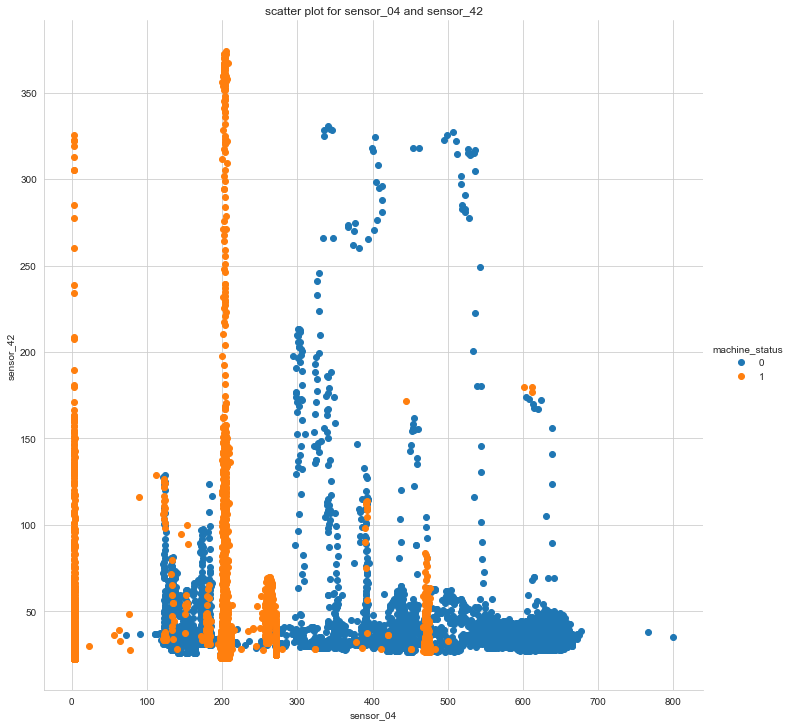

In [62]:
# Scatter plots
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="machine_status", height=10) \
   .map(plt.scatter, "sensor_04", "sensor_42") \
   .add_legend();
plt.title("scatter plot for sensor_04 and sensor_42")
plt.show();

### Observations from scatter plot of sensor_04 Vs sensor_42

* From the Scatter plots, we are observing both the class points are almost overlapping, so unable to classify using only this scatter plot

## scatter plot of 'sensor_31' and 'sensor_46'

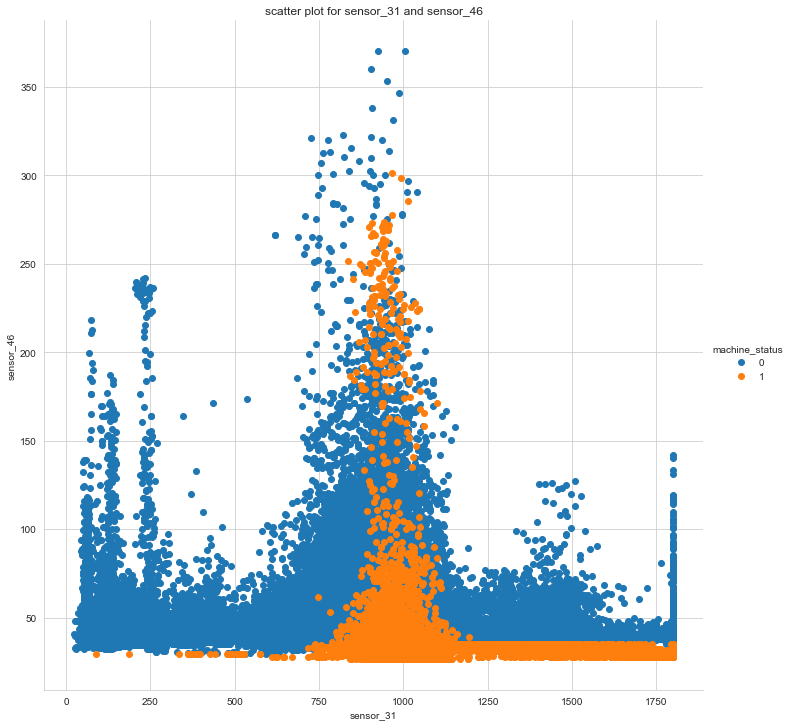

In [63]:
#Scatter plots
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="machine_status", height=10) \
   .map(plt.scatter, "sensor_31", "sensor_46") \
   .add_legend();
plt.title("scatter plot for sensor_31 and sensor_46")
plt.show();

### Observations from scatter plot of sensor_31 Vs sensor_46

* From the above Scatter plots, we are observing both the class points are overlapping, so unable to classify using this scatter plot

## scatter plot of 'sensor_07' and 'sensor_27'

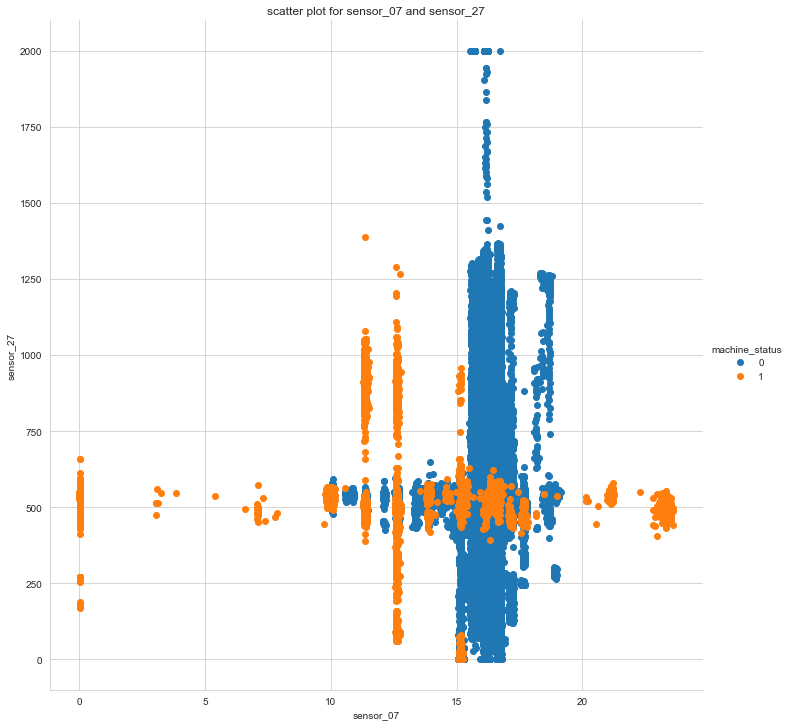

In [64]:
#Scatter plots
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="machine_status", height=10) \
   .map(plt.scatter, "sensor_07", "sensor_27") \
   .add_legend();
plt.title("scatter plot for sensor_07 and sensor_27")
plt.show();

### Observations from scatter plot of sensor_07 Vs sensor_27

* From the above Scatter plots, we are observing most of  the class points are overlapping, so unable to classify using the above scatter plot

## scatter plot of 'sensor_07' and 'sensor_26'

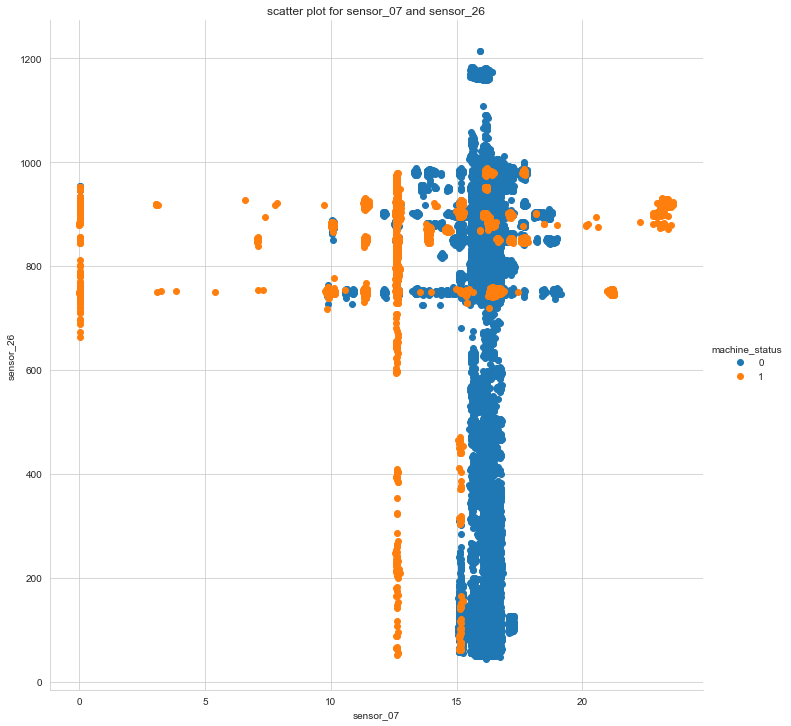

In [65]:
#Scatter plots
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="machine_status", height=10) \
   .map(plt.scatter, "sensor_07", "sensor_26") \
   .add_legend();
plt.title("scatter plot for sensor_07 and sensor_26")
plt.show();

### Observations from scatter plot of sensor_07 Vs sensor_26

* From the Scatter plots, we are observing both the class points are almost not overlapping, so this pair plot is useful to classify using scatter plot

## scatter plot of 'sensor_08' and 'sensor_39'

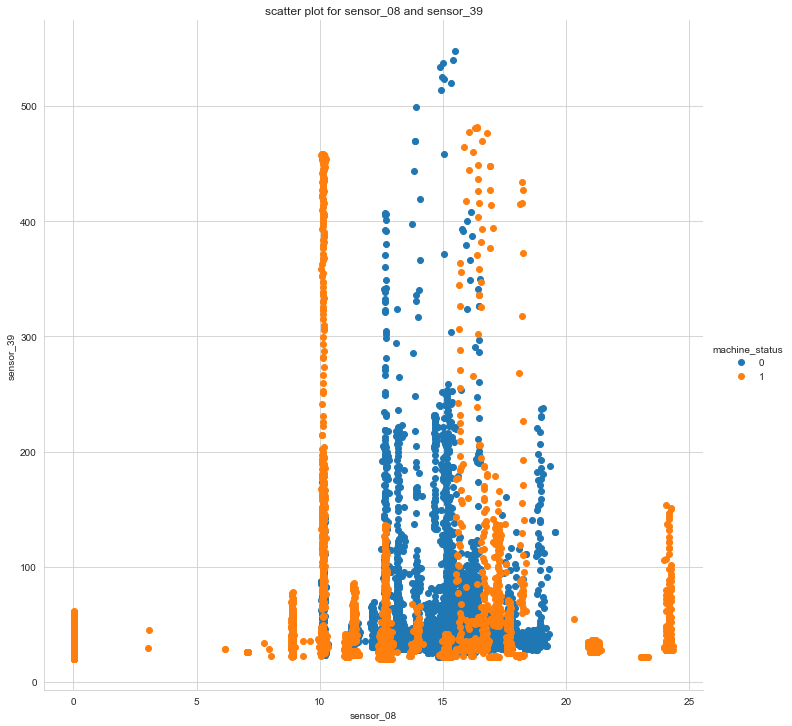

In [66]:
#Scatter plots
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="machine_status", height=10) \
   .map(plt.scatter, "sensor_08", "sensor_39") \
   .add_legend();
plt.title("scatter plot for sensor_08 and sensor_39")
plt.show();

### Observations from scatter plot of sensor_08 Vs sensor_39

* From the Scatter plots, we are observing both the class points are almost not overlapping, so this pair plot is useful to classify using scatter plot

# Feature Engineering

## Adding 5 polynomial features

In [67]:
print(most_correlated_features[0:20])

machine_status    1.000000
sensor_04         0.916227
sensor_10         0.872493
sensor_11         0.823450
sensor_00         0.810822
sensor_02         0.791278
sensor_06         0.773933
sensor_12         0.758752
sensor_50         0.732214
sensor_07         0.699499
sensor_01         0.673108
sensor_03         0.646204
sensor_08         0.637435
sensor_09         0.626434
sensor_05         0.434469
sensor_40         0.375146
sensor_48         0.366606
sensor_38         0.360583
sensor_49         0.285568
sensor_13         0.269811
Name: machine_status, dtype: float64


In [68]:
data['sensor_04_square']=[x**2 for x in data['sensor_04'].values]
data['sensor_10_square']=[x**2 for x in data['sensor_10'].values]
data['sensor_11_square']=[x**2 for x in data['sensor_11'].values]
data['sensor_00_square']=[x**2 for x in data['sensor_00'].values]
data['sensor_02_square']=[x**2 for x in data['sensor_02'].values]

## Adding new average feature ( average of features sensor_04,sensor_10,sensor_11,sensor_00,sensor_02)

In [69]:
data['average_feature']=(data['sensor_04']+data['sensor_10']+data['sensor_11']+data['sensor_00']+data['sensor_02'])/5

# KNN Model

In [70]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing A in heatmap format
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

## Storing the min and max values of each feature 

In [71]:
features_min=[]
for column in data.columns:
    if column != 'machine_status':
        features_min.append([column,data[column].min()])
        
features_max=[]
for column in data.columns:
    if column != 'machine_status':
        features_max.append([column,data[column].max()])

## Storing the average of the medians of the same class label points for each class for each feature 

In [72]:
temp=data.groupby('machine_status').median() # This computes the median of same class label points for each class for each feature

## printing the medians of the same class label points for each class for each feature

In [73]:
temp

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_48,sensor_49,sensor_50,sensor_51,sensor_04_square,sensor_10_square,sensor_11_square,sensor_00_square,sensor_02_square,average_feature
machine_status,,,,,,,,,,,,,,,,,,,,,
0,2.456539,48.26389,51.736111,44.357635,633.333374,75.648,13.679110,16.16753,15.49479,15.08247,...,146.122700,53.530090,198.49540,198.49540,401111.162652,1997.499110,2114.640458,6.034584,2676.625149,155.535129
1,0.001968,38.67188,38.715275,37.717014,3.567708,0.000,6.553819,11.34983,11.14005,11.29196,...,31.539352,31.539352,32.98611,36.16898,12.728542,0.130928,0.007535,0.000004,1498.872504,50.151232


In [74]:
medians_average = []
for column in data.columns:
    if column != 'machine_status':
        medians_average.append([column,temp[column].mean()]) # Storing (column, average of median of same class label points for each class for each column)

## Normalizing the features

In [75]:
# Min Max normalization
for column in data.columns:
    if column != 'machine_status':
        data[column]=(data[column]-data[column].min())/(data[column].max()-data[column].min())

## Filling the missing values with the median values of same class label points for each class for each feature

In [76]:
# https://stackoverflow.com/questions/18265930/pandas-filling-missing-values-within-a-group
for column in data.columns:
    if column != 'machine_status':
        data[column] = data[column].fillna(data.groupby('machine_status')[column].transform('median')) 

## Modification of the target variable(machine_status) for predictive modelling

* This entire dataset is collected at a time intervals of 1 minute, so 60 timestamps constitutes to 1 hour, 120 timestamps constitutes to 2 hours, 180 timestamps constitutes to 3 hours, 240 timestamps constitutes to 4 hours

* Y_60 : Here, 60 points before each BROKEN(1) point are considered as BROKEN(1)
* Y_120 : Here, 120 points before each BROKEN(1) point are considered as BROKEN(1)
* Y_180 : Here, 180 points before each BROKEN(1) point are considered as BROKEN(1)
* Y_240 : Here, 240 points before each BROKEN(1) point are considered as BROKEN(1)
* This modification is done in the below cell


In [77]:
Y_60 = data['machine_status'].values.copy() 
Y_120 = data['machine_status'].values.copy() 
Y_180 = data['machine_status'].values.copy() 
Y_240 = data['machine_status'].values.copy() 

# 60 points before each BROKEN(1) point are considered as BROKEN(1)
for i,ele in enumerate(Y_60):
    if ele == 1:
        if i >= 60:
            Y_60[i-60 : i] = 1
        else:
            Y_60[0 : i] = 1

# 120 points before each BROKEN(1) point are considered as BROKEN(1)
for i,ele in enumerate(Y_120):
    if ele == 1:
        if i >= 120:
            Y_120[i-120 : i]=1
        else:
            Y_120[0 : i] = 1

# 180 points before each BROKEN(1) point are considered as BROKEN(1)
for i,ele in enumerate(Y_180):
    if ele == 1:
        if i >= 180:
            Y_180[i-180 : i]=1
        else:
            Y_180[0 : i] = 1

# 240 points before each BROKEN(1) point are considered as BROKEN(1)
for i,ele in enumerate(Y_240):
    if ele == 1:
        if i >= 240:
            Y_240[i-240 : i]=1
        else:
            Y_240[0 : i] = 1

## Droping the target variable to train the model

In [78]:
X=data.drop('machine_status',axis=1) # droping the target variable to train the model

## Obtaining the four different datasets, in each of them, X remains the same and Y is one among [Y_60, Y_120, Y_180, Y_240]

In [79]:
# performing train test split on four different datasets
X_train_60, X_test_60, Y_train_60, Y_test_60 = train_test_split(X, Y_60, test_size=0.30, stratify=Y_60, random_state=42)
X_train_60, X_cv_60, Y_train_60, Y_cv_60 = train_test_split(X_train_60, Y_train_60, test_size=0.30, stratify=Y_train_60, random_state=42)
X_train_120, X_test_120, Y_train_120, Y_test_120 = train_test_split(X, Y_120, test_size=0.30, stratify=Y_120, random_state=42)
X_train_120, X_cv_120, Y_train_120, Y_cv_120 = train_test_split(X_train_120, Y_train_120, test_size=0.30, stratify=Y_train_120,random_state=42)
X_train_180, X_test_180, Y_train_180, Y_test_180 = train_test_split(X, Y_180, test_size=0.30, stratify=Y_180,random_state=42)
X_train_180, X_cv_180, Y_train_180, Y_cv_180 = train_test_split(X_train_180, Y_train_180, test_size=0.30, stratify=Y_train_180,random_state=42)
X_train_240, X_test_240, Y_train_240, Y_test_240 = train_test_split(X, Y_240, test_size=0.30, stratify=Y_240,random_state=42)
X_train_240, X_cv_240, Y_train_240, Y_cv_240 = train_test_split(X_train_240, Y_train_240, test_size=0.30, stratify=Y_train_240,random_state=42)

## Hyperparameter tuning for 'm' and 'k' 

 25%|████████████████████▊                                                              | 1/4 [03:28<10:25, 208.55s/it]

cv Log Loss for m=60 and k=5 is 0.0021880524375270647:
train Log Loss for m=60 and k=5 is 0.00043126431025240915:


 50%|█████████████████████████████████████████▌                                         | 2/4 [07:46<07:26, 223.50s/it]

cv Log Loss for m=60 and k=9 is 0.0027259650930989226:
train Log Loss for m=60 and k=9 is 0.0008265398883966794:


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [12:36<04:03, 243.46s/it]

cv Log Loss for m=60 and k=13 is 0.0032449834589539472:
train Log Loss for m=60 and k=13 is 0.0012642852478288115:


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [17:43<00:00, 265.92s/it]

cv Log Loss for m=60 and k=17 is 0.0037851432873066346:
train Log Loss for m=60 and k=17 is 0.0017097029369992015:


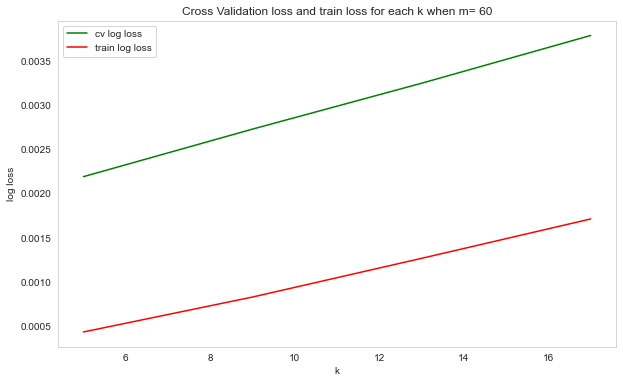

 25%|████████████████████▊                                                              | 1/4 [03:55<11:45, 235.04s/it]

cv Log Loss for m=120 and k=5 is 0.0009642721740779142:
train Log Loss for m=120 and k=5 is 0.0007078485605340071:


 50%|█████████████████████████████████████████▌                                         | 2/4 [10:38<09:30, 285.50s/it]

cv Log Loss for m=120 and k=9 is 0.0016312588651555182:
train Log Loss for m=120 and k=9 is 0.001320534866879777:


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [18:12<05:36, 336.25s/it]

cv Log Loss for m=120 and k=13 is 0.0022183624044733678:
train Log Loss for m=120 and k=13 is 0.0019589063426701707:


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [26:21<00:00, 395.32s/it]

cv Log Loss for m=120 and k=17 is 0.002918741944631311:
train Log Loss for m=120 and k=17 is 0.002623791565086224:


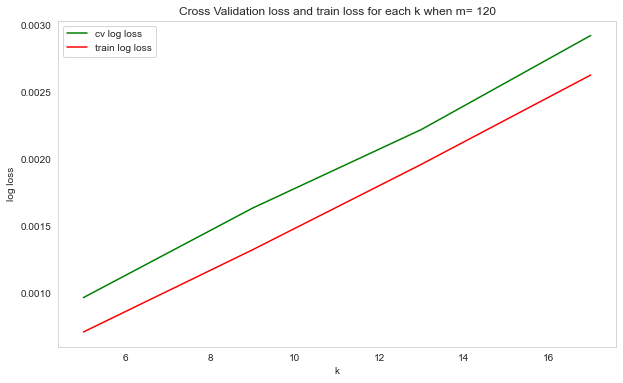

 25%|████████████████████▊                                                              | 1/4 [05:24<16:14, 324.69s/it]

cv Log Loss for m=180 and k=5 is 0.003245251816569593:
train Log Loss for m=180 and k=5 is 0.0006318813920168081:


 50%|█████████████████████████████████████████▌                                         | 2/4 [11:54<11:28, 344.25s/it]

cv Log Loss for m=180 and k=9 is 0.001938456384712481:
train Log Loss for m=180 and k=9 is 0.0014733519705446847:


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [19:09<06:11, 371.41s/it]

cv Log Loss for m=180 and k=13 is 0.0027069504690643994:
train Log Loss for m=180 and k=13 is 0.0022733107508262538:


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [26:57<00:00, 404.25s/it]

cv Log Loss for m=180 and k=17 is 0.0034021417743554027:
train Log Loss for m=180 and k=17 is 0.0030511683294486922:


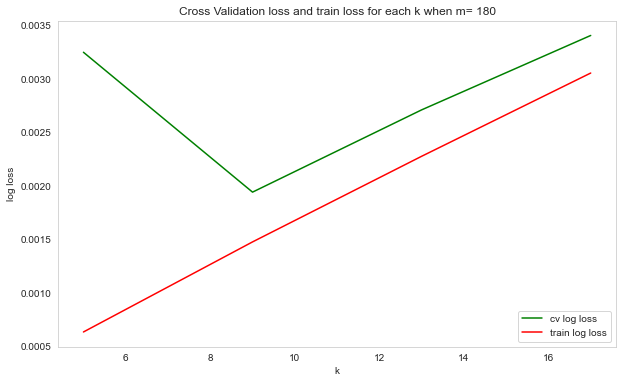

 25%|████████████████████▊                                                              | 1/4 [05:00<15:00, 300.08s/it]

cv Log Loss for m=240 and k=5 is 0.0021565702637852237:
train Log Loss for m=240 and k=5 is 0.0005933753805626075:


 50%|█████████████████████████████████████████▌                                         | 2/4 [11:17<10:46, 323.25s/it]

cv Log Loss for m=240 and k=9 is 0.002998486892800786:
train Log Loss for m=240 and k=9 is 0.0013564795241583884:


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [18:22<05:53, 353.71s/it]

cv Log Loss for m=240 and k=13 is 0.0038917951109249827:
train Log Loss for m=240 and k=13 is 0.0021900254293834845:


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [26:01<00:00, 390.44s/it]

cv Log Loss for m=240 and k=17 is 0.004675550690795205:
train Log Loss for m=240 and k=17 is 0.003013489123226593:


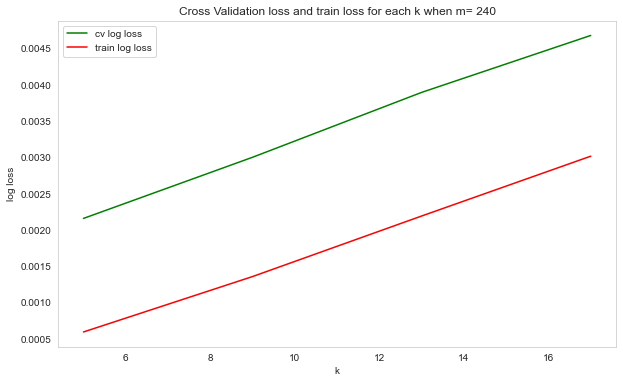

In [80]:
from tqdm import tqdm
X_train=[X_train_60,X_train_120,X_train_180,X_train_240] # storing each dataset's train data points
Y_train=[Y_train_60,Y_train_120,Y_train_180,Y_train_240] # storing target values of each dataset's train data points 
X_cv=[X_cv_60,X_cv_120,X_cv_180,X_cv_240] # storing each dataset's cv data points
Y_cv=[Y_cv_60,Y_cv_120,Y_cv_180,Y_cv_240] # storing target values of each dataset's cv data points 
X_test=[X_test_60,X_test_120,X_test_180,X_test_240] # storing each dataset's test data points
Y_test=[Y_test_60,Y_test_120,Y_test_180,Y_test_240] # storing target values of each dataset's test data points 

m=[60,120,180,240] #different values of hyperparameter 'm'
y=[Y_60,Y_120,Y_180,Y_240] # storing target values corresponding to each 'm'

knn_res=[] # this list stores cv log loss and train log loss for every pair of 'm' and 'k'
for index,ele in enumerate(y):
    k = [5, 9, 13, 17] 

    
    cv_log_loss_array = [] # list to store cv log loss for eack 'k'
    train_log_loss_array = [] # list to store train log loss for each 'k'
    
    for i in tqdm(k): # for every value of 'k'
   
        clf = KNeighborsClassifier(n_neighbors=i,n_jobs=-1) # K Nearest neighbour classifier
        clf.fit(X_train[index], Y_train[index]) # Training the model

        clf_probs_cv=clf.predict_proba(X_cv[index]) # model predicted class probabilities for every data point in X_cv
        clf_probs_train=clf.predict_proba(X_train[index]) # model predicted class probabilities for every data point in X_train
        cv_log_loss_array.append(log_loss(Y_cv[index], clf_probs_cv, labels=clf.classes_, eps=1e-15))
        train_log_loss_array.append(log_loss(Y_train[index], clf_probs_train, labels=clf.classes_, eps=1e-15))
       
        print("cv Log Loss for m={} and k={} is {}:".format(m[index],i,log_loss(Y_cv[index], clf_probs_cv))) 
        print("train Log Loss for m={} and k={} is {}:".format(m[index],i,log_loss(Y_train[index], clf_probs_train))) 
        knn_res.append([m[index],i,log_loss(Y_cv[index], clf_probs_cv),log_loss(Y_train[index], clf_probs_train)])

    # plotting 
    fig, ax = plt.subplots(figsize=(10,6)) # defining figure size
    ax.plot(k, cv_log_loss_array,c='g',label='cv log loss') # plotting k Vs cv_log_loss_array
    ax.plot(k, train_log_loss_array,c='r',label='train log loss') # plotting k Vs train_log_loss_array
    plt.legend() # adding legend
    plt.grid() # adding grid to the plot
    plt.title("Cross Validation loss and train loss for each k when m= " + str(m[index]))
    plt.xlabel("k")
    plt.ylabel("log loss")
    plt.show()  

In [81]:
knn_res

[[60, 5, 0.0021880524375270647, 0.00043126431025240915],
 [60, 9, 0.0027259650930989226, 0.0008265398883966794],
 [60, 13, 0.0032449834589539472, 0.0012642852478288115],
 [60, 17, 0.0037851432873066346, 0.0017097029369992015],
 [120, 5, 0.0009642721740779142, 0.0007078485605340071],
 [120, 9, 0.0016312588651555182, 0.001320534866879777],
 [120, 13, 0.0022183624044733678, 0.0019589063426701707],
 [120, 17, 0.002918741944631311, 0.002623791565086224],
 [180, 5, 0.003245251816569593, 0.0006318813920168081],
 [180, 9, 0.001938456384712481, 0.0014733519705446847],
 [180, 13, 0.0027069504690643994, 0.0022733107508262538],
 [180, 17, 0.0034021417743554027, 0.0030511683294486922],
 [240, 5, 0.0021565702637852237, 0.0005933753805626075],
 [240, 9, 0.002998486892800786, 0.0013564795241583884],
 [240, 13, 0.0038917951109249827, 0.0021900254293834845],
 [240, 17, 0.004675550690795205, 0.003013489123226593]]

# Training the model with best values of 'm' and 'k'

In [82]:
# As observed in the above Hyperparameter tuning, when k = 5 and m = 120, we got lowest cv log loss and also model is not overfitting(difference between cv log loss and train log loss is not too large), so considered k=5 and m=120 
best_k = 5
best_m = 120

clf_best = KNeighborsClassifier(n_neighbors=best_k,n_jobs=-1)
clf_best.fit(X_train_120, Y_train_120) #training the model

predict_y_tr = clf_best.predict_proba(X_train_120) # model predicted class probabilities for every data point in X_train_120
print('For values of best k = ', 5, "The train log loss is:",log_loss(Y_train_120, predict_y_tr, labels=clf_best.classes_, eps=1e-15))
predict_y_cv = clf_best.predict_proba(X_cv_120) # model predicted class probabilities for every data point in X_cv_120
print('For values of best k = ',5, "The cross validation log loss is:",log_loss(Y_cv_120, predict_y_cv, labels=clf_best.classes_, eps=1e-15))
predict_y_te = clf_best.predict_proba(X_test_120) # model predicted class probabilities for every data point in X_test_120
print('For values of best k = ',5, "The test log loss is:",log_loss(Y_test_120, predict_y_te, labels=clf_best.classes_, eps=1e-15))

For values of best k =  5 The train log loss is: 0.0007078485605340071
For values of best k =  5 The cross validation log loss is: 0.0009642721740779142
For values of best k =  5 The test log loss is: 0.0024975176758787626


In [83]:
clf_best

KNeighborsClassifier(n_jobs=-1)

## Plotting confusion matrix, precision matrix, recall matrix and printing f1-score

-------------------- Confusion matrix --------------------


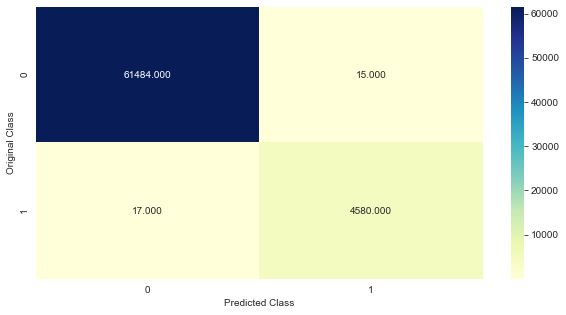

-------------------- Precision matrix (Columm Sum=1) --------------------


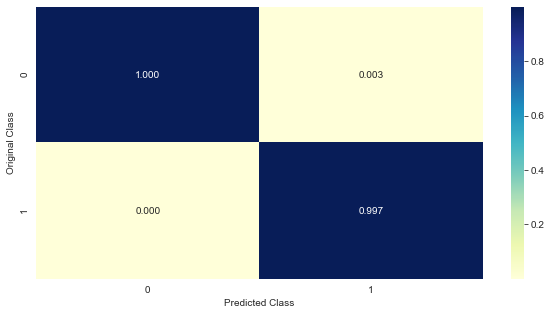

-------------------- Recall matrix (Row sum=1) --------------------


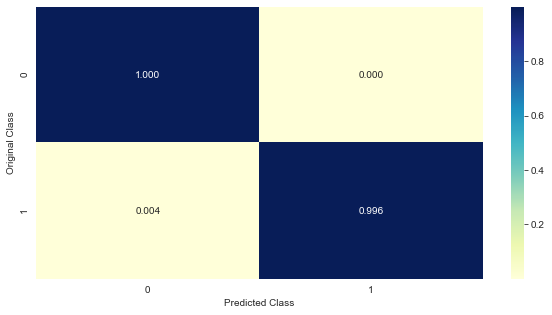

macro average f1 score is 0.9981292746608929


In [84]:
from sklearn.metrics import f1_score
predict_y_te=clf_best.predict(X_test_120)
plot_confusion_matrix(Y_test_120,predict_y_te)
f1=f1_score(Y_test_120, predict_y_te, average='macro')
print('macro average f1 score is {}'.format(f1))

## storing each 'm', 'k', 'cv_log_loss', 'train_log_loss' in to a pandas dataframe

In [85]:
df = pd.DataFrame(knn_res, columns = ['m','k','cv_log_loss','train_log_loss']) 

In [86]:
print(df) # printing the above dataframe

      m   k  cv_log_loss  train_log_loss
0    60   5     0.002188        0.000431
1    60   9     0.002726        0.000827
2    60  13     0.003245        0.001264
3    60  17     0.003785        0.001710
4   120   5     0.000964        0.000708
5   120   9     0.001631        0.001321
6   120  13     0.002218        0.001959
7   120  17     0.002919        0.002624
8   180   5     0.003245        0.000632
9   180   9     0.001938        0.001473
10  180  13     0.002707        0.002273
11  180  17     0.003402        0.003051
12  240   5     0.002157        0.000593
13  240   9     0.002998        0.001356
14  240  13     0.003892        0.002190
15  240  17     0.004676        0.003013


## storing best classifier parameters to pickle files for model deployment

In [87]:
import joblib 

In [88]:
joblib.dump(features_min, 'features_min.pkl')
joblib.dump(features_max, 'features_max.pkl')
joblib.dump(medians_average, 'medians_average.pkl')
joblib.dump(clf_best, 'model.pkl')

['model.pkl']

# function 1

In [89]:
#https://stackoverflow.com/questions/60057405/python-convert-list-of-strings-to-floats-with-empty-none
def try_float(v):
    try:
        return float(v)
    except Exception:
        return float('nan')


import math

#this function will predict whether the machine will become faulty or not in next 2 hours
def predict(sen_inp):
    inputs = sen_inp
    print(inputs)
    print(len(inputs))
    
    #converting single string in to a list of strings
    inputs=sen_inp.split(',')
    print(inputs)
    print(len(inputs))
    
    #removing some features(because model is trained without these features)
    unwanted = [0, 1, 17]
    for ele in sorted(unwanted, reverse = True): 
        del inputs[ele]
    print(inputs)
    print(len(inputs))
    
    # converting list of strings in to list of floats
    lst=[]
    for ele in inputs:
        lst.append(try_float(ele))
    inputs = lst
    print(inputs)
    print(len(inputs))
    
    
    #adding polynomial features
    sensor_04_square=inputs[4]**2
    inputs.append(sensor_04_square)
    sensor_10_square=inputs[10]**2
    inputs.append(sensor_10_square)
    sensor_11_square=inputs[11]**2
    inputs.append(sensor_11_square)
    sensor_00_square=inputs[0]**2
    inputs.append(sensor_00_square)
    sensor_02_square=inputs[2]**2
    inputs.append(sensor_02_square)
    
    #adding average feature
    inputs.append((inputs[4]+inputs[10]+inputs[11]+inputs[0]+inputs[2])/5)
    print(len(inputs))
    
    #min_max normalization
    lst=[]
    for i,ele in enumerate(inputs):
        lst.append((ele-float(features_min[i][1]))/(float(features_max[i][1])-float(features_min[i][1])))
    inputs = lst
    print(inputs)
    print(len(inputs))
    
    #Filling the missing values
    for i,ele in enumerate(inputs):
        if math.isnan(ele):
            inputs[i] = medians_average[i][1]
    print(inputs)
    print(len(inputs))
    
    #predicting class label
    pred=clf_best.predict([inputs])[0]
    print(pred)
    if pred == 1:
        print("Machine will  become faulty in next 2 hours")
    else:
        print("Machine will not become faulty in next 2 hours")
    
    

In [90]:
#sample input
temp="136342,2018-07-04 16:22:00,0.112152777612209,40.10416,37.5,40.842010498046896,203.104736328125,0.0,11.335360000000001,12.67361,12.67361,12.5651,0.7949096999999999,0.5869092,0.0,0.0,419.4737,,462.8389,465.844,2.578778,667.2098,399.6709,880.6523,533.0026,1091.013,628.1978,762.9603,919.8334,511.537,1055.038,512.7946,703.7037,929.1666,931.3359,511.3477,271.4516,552.1484,603.6886,59.952819999999996,41.40625,40.10416,53.906246185302706,35.41666,41.40625,67.96875,32.4074058532715,32.986110687255895,35.879631042480504,35.3009262084961,34.43287,32.986110687255895,35.0115737915039,35.01157"

In [91]:
#testing predict function with sample input
predict(temp)

136342,2018-07-04 16:22:00,0.112152777612209,40.10416,37.5,40.842010498046896,203.104736328125,0.0,11.335360000000001,12.67361,12.67361,12.5651,0.7949096999999999,0.5869092,0.0,0.0,419.4737,,462.8389,465.844,2.578778,667.2098,399.6709,880.6523,533.0026,1091.013,628.1978,762.9603,919.8334,511.537,1055.038,512.7946,703.7037,929.1666,931.3359,511.3477,271.4516,552.1484,603.6886,59.952819999999996,41.40625,40.10416,53.906246185302706,35.41666,41.40625,67.96875,32.4074058532715,32.986110687255895,35.879631042480504,35.3009262084961,34.43287,32.986110687255895,35.0115737915039,35.01157
586
['136342', '2018-07-04 16:22:00', '0.112152777612209', '40.10416', '37.5', '40.842010498046896', '203.104736328125', '0.0', '11.335360000000001', '12.67361', '12.67361', '12.5651', '0.7949096999999999', '0.5869092', '0.0', '0.0', '419.4737', '', '462.8389', '465.844', '2.578778', '667.2098', '399.6709', '880.6523', '533.0026', '1091.013', '628.1978', '762.9603', '919.8334', '511.537', '1055.038', '512.7946

# function 2


In [103]:
#this function will compute f1 score if provided set of inputs and its corresponding y values
def compute_f1_score(inputs,Y_values):
    predict_y=clf_best.predict(inputs)
    f1=f1_score(Y_values, predict_y, average='macro')
    print('macro average f1 score is {}'.format(f1))
    return f1

In [104]:
f1=compute_f1_score(X_test_120,Y_test_120)

macro average f1 score is 0.9981292746608929


## app.py 

In [2]:
# app.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from flask import Flask, jsonify, request
import joblib
import math

# https://www.tutorialspoint.com/flask
import flask
app = Flask(__name__)

#https://stackoverflow.com/questions/60057405/python-convert-list-of-strings-to-floats-with-empty-none
def try_float(ele):
    try:
        return float(ele)
    except Exception:
        return float('nan')

features_min=joblib.load('features_min.pkl',mmap_mode=None)
features_max=joblib.load('features_max.pkl',mmap_mode=None)
medians_average=joblib.load('medians_average.pkl',mmap_mode=None)
clf = joblib.load('model.pkl',mmap_mode=None)
print(len(features_min))
print(len(features_max))
print(len(medians_average))

@app.route('/')
def hello_world():
    return 'Hello World!'


@app.route('/predictive_maintenance')
def predictive_maintenance():
    return flask.render_template('predictive_maintenance.html')


@app.route('/predict', methods=['POST'])



def predict():
    inputs = request.form.to_dict()
    sensor_inputs = inputs['sensor_inputs']
    inputs = sensor_inputs
    
    #converting single string in to a list of strings
    inputs=inputs.split(',')
    
    
    #removing some features(because model is trained without these features)
    unwanted = [0, 1, 17]
    for ele in sorted(unwanted, reverse = True): 
        del inputs[ele]
    
    # converting list of strings in to list of floats
    lst=[]
    for ele in inputs:
        lst.append(try_float(ele))
    inputs = lst
    
    #adding polynomial features
    sensor_04_square=inputs[4]**2
    inputs.append(sensor_04_square)
    sensor_10_square=inputs[10]**2
    inputs.append(sensor_10_square)
    sensor_11_square=inputs[11]**2
    inputs.append(sensor_11_square)
    sensor_00_square=inputs[0]**2
    inputs.append(sensor_00_square)
    sensor_02_square=inputs[2]**2
    inputs.append(sensor_02_square)
    
    #adding average feature
    inputs.append((inputs[4]+inputs[10]+inputs[11]+inputs[0]+inputs[2])/5)
   
    
    #min_max normalization
    lst=[]
    for i,ele in enumerate(inputs):
        lst.append((ele-float(features_min[i][1]))/(float(features_max[i][1])-float(features_min[i][1])))
    inputs = lst
  
    
    #Filling the missing values
    for i,ele in enumerate(inputs):
        if math.isnan(ele):
            inputs[i] = medians_average[i][1]
   
 
    #predicting class label
    pred=clf.predict([inputs])[0]
    #print(pred)
    if pred == 0:
        prediction = "Machine will not become faulty in next 2 hours"
    else:
        prediction = "Machine will become faulty in next 2 hours"
    
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=8082)
    
    

57
57
57
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:8082/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Apr/2021 22:58:06] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [10/Apr/2021 22:58:06] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [10/Apr/2021 22:58:30] "GET /predictive_maintenance HTTP/1.1" 200 -
127.0.0.1 - - [10/Apr/2021 22:58:46] "POST /predict HTTP/1.1" 200 -
